In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
import re
import scipy.stats as st
#Paramètres graphiques
plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 14

data_cust = pd.read_csv('customers.csv', sep=',')
data_prod = pd.read_csv('products.csv',sep=',')
data_transat = pd.read_csv('transactions.csv', sep=',')

In [2]:
# 1) Outliers
# 2) Ajouter une colonne tranche d'âge et créer une heatmap pour la dernière corrélation

# PowerPoint
# 1) Montrer les opérations de nettoyage effectuées 
# 2) Montrer l'ensemble des graphs (et expliquer la courbe de Lorenz)
# 3) Mettre les métriques
# 4) Conclusion = conseils en fonction d'hypothèse d'objectifs de l'entreprise, des corrélations et des analyses

## Mission 1 : Nettoyage des données

Données à nettoyer : 
- Valeurs aberrantes
- Valeurs manquantes 
- Autres

In [3]:
print(data_cust.describe())
print(data_prod.describe())
print(data_transat.describe())
print('data_cust : ',data_cust['client_id'].unique(),data_cust['sex'].unique(),data_cust['birth'].unique())
print('data_prod : ',data_prod['id_prod'].unique(),data_prod['price'].unique(),data_prod['categ'].unique())
print('data_transat : ',data_transat['id_prod'].unique(),data_transat['date'].unique(),data_transat['session_id'],data_transat['client_id'].unique())

             birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000
             price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000
       id_prod                             date session_id client_id
count   337016                           337016     337016    337016
unique    3266                           336855     169195      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      1081                               13        200     12855
data_cust :  ['c_4410' 'c_7839' 'c_1699' ... 'c_5119' 'c_5643' 'c_84'] ['f' 'm'] [1967 1975 1984 1962 1943 1993 1978 1971 1982 1945 2003 1959 1977 1954
 1987 2000 1992 1963 1958 1994 1936 1986 194

### Customers

In [4]:
def convert_birth(birth):
    found = re.search('^[12]?[90]?[0123456789]+', str(birth))
    if found is None:
        return np.NaN
    else: 
        return str(birth)
    
data_cust['birth'] = [convert_birth(t) for t in data_cust['birth']]

def convert_id_cust(id):
    found = re.search('^c_[0123456789]+', str(id))
    if found is None:
        return np.NaN
    else: 
        return id
    
data_cust['client_id'] = [convert_id_cust(t) for t in data_cust['client_id']]

def convert_sex(sex):
    found = re.search('^[mf]?', str(sex))
    if found is None:
        return np.NaN
    else: 
        return sex
    
data_cust['sex'] = [convert_sex(t) for t in data_cust['sex']]

Quelles sont les valeurs NaN ? Doivent-elles être supprimées ?

In [5]:
print(data_cust[data_cust['client_id'].isnull() == True])
print(data_cust[data_cust['sex'].isnull() == True])
print(data_cust[data_cust['birth'].isnull() == True])

data_cust = data_cust.replace(np.NaN,np.nan)
data_custo = data_cust.dropna(axis=0)
print(data_cust.shape,data_custo.shape)

     client_id sex birth
2735       NaN   f  2001
8494       NaN   m  2001
Empty DataFrame
Columns: [client_id, sex, birth]
Index: []
Empty DataFrame
Columns: [client_id, sex, birth]
Index: []
(8623, 3) (8621, 3)


### Products 

In [6]:
print(data_prod.sort_values(by='id_prod',ascending=False))
print(data_prod.sort_values(by='price',ascending=False))

     id_prod   price  categ
731      T_0   -1.00      0
3188    2_99   84.99      2
3088    2_98  149.74      2
2698    2_97  160.99      2
2576    2_96   47.91      2
...      ...     ...    ...
922   0_1000    6.84      0
663    0_100   20.60      0
2691    0_10   17.95      0
803      0_1   10.99      0
1001     0_0    3.75      0

[3287 rows x 3 columns]
     id_prod   price  categ
947      2_2  300.00      2
724     2_76  254.44      2
394    2_158  247.22      2
1436   2_167  236.99      2
2779    2_30  233.54      2
...      ...     ...    ...
1211  0_1844    0.77      0
370    0_120    0.66      0
2272   0_528    0.62      0
2355   0_202    0.62      0
731      T_0   -1.00      0

[3287 rows x 3 columns]


In [7]:
def convert_id_prod(idp):
    found = re.search('^[012]?_[0123456789]+', str(idp))
    if found is None:
        return np.NaN
    else: 
        return str(idp)
    
data_prod['id_prod'] = [convert_id_prod(t) for t in data_prod['id_prod']]

def convert_price(infla):
    found = re.search('^[0123]?[0123456789]*.[0123456789]?[0123456789]?$', str(infla))
    if found is None:
        return np.NaN
    else: 
        return infla

data_prod['price'] = data_prod['price'].astype('float') 
data_prod['price'] = [convert_price(t) for t in data_prod['price']]



def convert_categ(catogan):
    found = re.search('^[012]?$', str(catogan))
    if found is None:
        return np.NaN
    else: 
        return catogan
    
data_prod['categ'] = [convert_categ(t) for t in data_prod['categ']]

Quelles sont les valeurs NaN ? Doivent-elles être supprimées ?

In [8]:
print(data_prod[data_prod['id_prod'].isnull() == True])
print(data_prod[data_prod['price'].isnull() == True])
print(data_prod[data_prod['categ'].isnull() == True])

    id_prod  price  categ
731     NaN    NaN      0
    id_prod  price  categ
731     NaN    NaN      0
Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


In [9]:
data_prod = data_prod.replace(np.NaN,np.nan)
data_prodo = data_prod.dropna(axis=0)
print(data_prod.shape,data_prodo.shape)

(3287, 3) (3286, 3)


In [10]:
print(data_prod[data_prod['id_prod'].isnull() == True])
print(data_prod[data_prod['price'].isnull() == True])
print(data_prod[data_prod['categ'].isnull() == True])
print('-'*50)
print(data_prodo[data_prodo['id_prod'].isnull() == True])
print(data_prodo[data_prodo['price'].isnull() == True])
print(data_prodo[data_prodo['categ'].isnull() == True])

    id_prod  price  categ
731     NaN    NaN      0
    id_prod  price  categ
731     NaN    NaN      0
Empty DataFrame
Columns: [id_prod, price, categ]
Index: []
--------------------------------------------------
Empty DataFrame
Columns: [id_prod, price, categ]
Index: []
Empty DataFrame
Columns: [id_prod, price, categ]
Index: []
Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


### Transactions

In [11]:
def convert_id_prod(idp):
    found = re.search('^[012]_[0123456789]+', str(idp))
    if found is None:
        return np.NaN
    else: 
        return idp
    
data_transat['id_prod'] = [convert_id_prod(t) for t in data_transat['id_prod']]


def convert_id_session(ses):
    found = re.search('^s_[123456789]+', str(ses))
    if found is None:
        return np.NaN
    else: 
        return ses
    
data_transat['session_id'] = [convert_id_session(t) for t in data_transat['session_id']]

def convert_id_client(id):
    found = re.search('^c_[0123456789]+', str(id))
    if found is None:
        return np.NaN
    else: 
        return id
    
data_transat['client_id'] = [convert_id_client(t) for t in data_transat['client_id']]

In [12]:
data_transat = data_transat.replace(np.NaN,np.nan)
data_ransac = data_transat.dropna(axis=0)
print(data_transat.shape,data_ransac.shape)

(337016, 4) (336816, 4)


In [13]:
print(data_transat[data_transat['id_prod'].isnull() == True])
print(' '*15)
print(data_transat[data_transat['id_prod'].isnull() == True].count())
print('='*15)
print(data_transat[data_transat['session_id'].isnull() == True])
print('='*15)
print(data_transat[data_transat['client_id'].isnull() == True])
print('='*15)
print(data_transat[data_transat['date'].isnull() == True])
print('-'*50)
print(data_ransac[data_ransac['id_prod'].isnull() == True])
print('='*15)
print(data_ransac[data_ransac['session_id'].isnull() == True])
print('='*15)
print(data_ransac[data_ransac['client_id'].isnull() == True])
print('='*15)
print(data_ransac[data_ransac['date'].isnull() == True])

       id_prod                             date session_id client_id
1431       NaN  test_2021-03-01 02:30:02.237420        NaN       NaN
2365       NaN  test_2021-03-01 02:30:02.237446        NaN       NaN
2895       NaN  test_2021-03-01 02:30:02.237414        NaN       NaN
5955       NaN  test_2021-03-01 02:30:02.237441        NaN       NaN
7283       NaN  test_2021-03-01 02:30:02.237434        NaN       NaN
...        ...                              ...        ...       ...
332594     NaN  test_2021-03-01 02:30:02.237445        NaN       NaN
332705     NaN  test_2021-03-01 02:30:02.237423        NaN       NaN
332730     NaN  test_2021-03-01 02:30:02.237421        NaN       NaN
333442     NaN  test_2021-03-01 02:30:02.237431        NaN       NaN
335279     NaN  test_2021-03-01 02:30:02.237430        NaN       NaN

[200 rows x 4 columns]
               
id_prod         0
date          200
session_id      0
client_id       0
dtype: int64
       id_prod                             date

### Valeurs manquantes

In [14]:
data_trancli = pd.merge(data_custo,data_ransac, how='outer', on='client_id')
data_trancli

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715
...,...,...,...,...,...,...
336832,c_84,f,1982,1_459,2022-02-17 00:16:56.629536,s_166337
336833,c_84,f,1982,0_1050,2021-09-20 10:05:37.086910,s_92701
336834,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960
336835,c_84,f,1982,1_343,2021-04-13 03:59:33.614841,s_19845


Quelles sont les valeurs NaN ? Doivent-elles être supprimées ?

In [15]:
print('1 :' )
print(data_trancli[data_trancli['date'].isnull() == True])
print('='*15)
print(data_trancli[data_trancli['date'].isnull() == True].count())
print('-'*50)
print('2 :' )
print(data_trancli[data_trancli['client_id'].isnull() == True])
print('='*15)
print(data_trancli[data_trancli['client_id'].isnull() == True].count())
print('-'*50)
print('3 :' )
print(data_trancli[data_trancli['birth'].isnull() == True])
print('='*15)
print(data_trancli[data_trancli['birth'].isnull() == True].count())

1 :
       client_id sex birth id_prod date session_id
29516     c_8253   f  2001     NaN  NaN        NaN
99355     c_3789   f  1997     NaN  NaN        NaN
108189    c_4406   f  1998     NaN  NaN        NaN
109296    c_2706   f  1967     NaN  NaN        NaN
111918    c_3443   m  1959     NaN  NaN        NaN
123281    c_4447   m  1956     NaN  NaN        NaN
123535    c_3017   f  1992     NaN  NaN        NaN
129492    c_4086   f  1992     NaN  NaN        NaN
155401    c_6930   m  2004     NaN  NaN        NaN
158642    c_4358   m  1999     NaN  NaN        NaN
192277    c_8381   f  1965     NaN  NaN        NaN
194912    c_1223   m  1963     NaN  NaN        NaN
242571    c_6862   f  2002     NaN  NaN        NaN
245941    c_5245   f  2004     NaN  NaN        NaN
250813    c_5223   m  2003     NaN  NaN        NaN
255211    c_6735   m  2004     NaN  NaN        NaN
259511     c_862   f  1956     NaN  NaN        NaN
268947    c_7584   f  1960     NaN  NaN        NaN
303027      c_90   m  2001 

1 : "client" n'ayant pas d'achat à leur nom dans la base de données

2 : Tous les achats sont référencés à un client

3 : Produits n'étant pas achetés ou ayant été retiré du catalogue de produit de l'entreprise mais toujours présent dans la base de données  

4 : Produits n'ayant pas de prix ni catégorie 

In [16]:
data_glob = pd.merge(data_trancli,data_prodo, how='outer', on='id_prod')
#data_glob = data_glob.drop(['client_id_x','id_prod_x','date_x'], axis=1)
#data_glob = data_glob.rename(columns = {'id_prod_y':'id_prod','date_y':'date','client_id_y':'client_id'})
#data_glob = data_glob[['client_id','sex','birth','id_prod','price','categ','date']]

Pour les produits : quels sont les catégories des produits ayant des données manquantes ? 

In [17]:
print(data_glob[data_glob['price'].isnull() == True]['id_prod'].unique())

['0_2245' nan]


1 seul produit a des données manquantes, l'id du produit est 0_2245

In [18]:
def fill_categ(categ, replacement):
    if pd.isnull(categ):
        return replacement
    return categ

def fill_price(price, replacement):
    if pd.isnull(price):
        return replacement
    return price

mean_price = data_glob[data_glob['categ'] == 0]['price'].mean()
data_glob['price'] = [fill_categ(t,mean_price) for t in data_glob['price']]
data_glob['categ'] = [fill_categ(t,0) for t in data_glob['categ']]

In [19]:
#print(data_glob[data_glob['date'].isnull() == True])
#print('='*15)
print(data_glob[data_glob['date'].isnull() == True].count())
print('-'*50)
#print(data_glob[data_glob['client_id'].isnull() == True])
#print('='*15)
print(data_glob[data_glob['client_id'].isnull() == True].count())
data_glob_nan = data_glob.dropna(axis=0)
print(data_glob.shape,data_glob_nan.shape)

client_id     21
sex           21
birth         21
id_prod       22
date           0
session_id     0
price         43
categ         43
dtype: int64
--------------------------------------------------
client_id      0
sex            0
birth          0
id_prod       22
date           0
session_id     0
price         22
categ         22
dtype: int64
(336859, 8) (336816, 8)


In [20]:
data_glob_nan['date'] = pd.to_datetime(data_glob_nan['date'])
#data_transat['date'] = pd.to_datetime(data_transat['date'])

df_months = data_glob_nan.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()

<ipython-input-20-2ea2d9f9bf65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_glob_nan['date'] = pd.to_datetime(data_glob_nan['date'])


### Analyse des ventes par mois 

In [21]:
df_months.drop(['categ'],axis=1)

,date,price
0,2021-03-31,479407.853648
1,2021-04-30,473129.779008
2,2021-05-31,489453.126576
3,2021-06-30,481332.469504
4,2021-07-31,480941.248288
5,2021-08-31,479401.013648
6,2021-09-30,502899.044864
7,2021-10-31,319234.489504
8,2021-11-30,512996.640720
9,2021-12-31,523012.209504


Nous pouvons déjà constater une différence. En effet, lors du mois d'octobre 2021, le chiffre n'est de seulement 750 000 euros environ alors que les autres mois nous avions systématiquement dépassé le million de chiffre d'affaire voire s'approché d'1 500 000. 

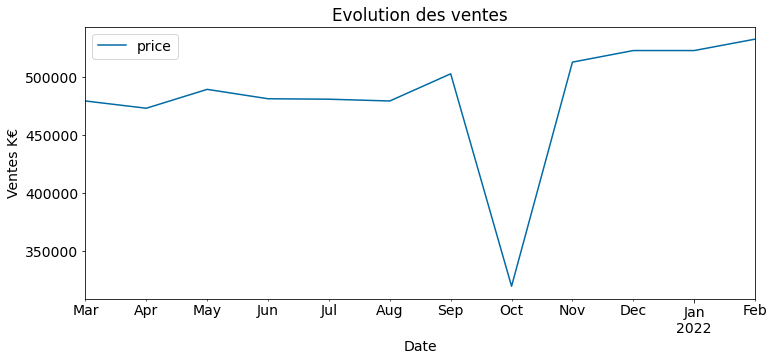

In [22]:
df_months.plot(x='date', y='price')

plt.title('Evolution des ventes')
plt.xlabel('Date')
plt.ylabel('Ventes K€')
plt.show()

La chute que l'on avait aperçue se confirme. Alors que le chiffre d'affaire stagne autour de 1 200 millions pendant les 9 premiers mois de 2021, mais ici la chute est assimilée au mois de novembre et le mois d'octobre connais quant à lui une augmentation. Ensuite, on assite à une réaugmentation du chiffre d'affaire 1 400 millions entre décembre 2021 et mars 2022

Pourquoi ?

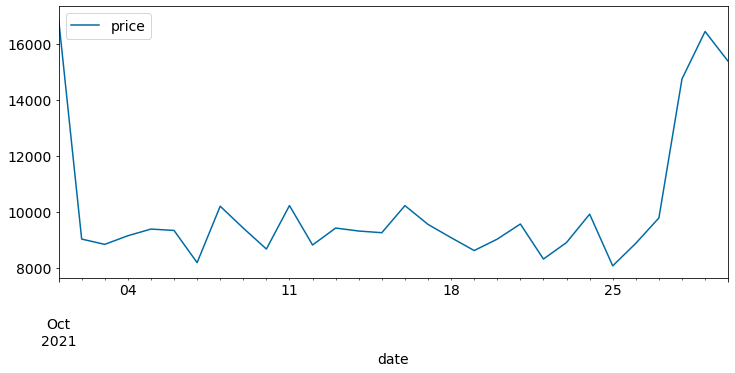

In [23]:
df_monthe = data_glob_nan.groupby(pd.Grouper(key='date', freq='d')).sum()
df_months_CA = df_monthe.drop(['categ'],axis=1)

df_months_CA['2021-10-01':'2021-10-30'].plot()

Grâce à ce graphique, nous pouvons constater que la chute du chiffre d'affaire commence dans la journée du 2 octobre 2021 et remonte le 28 octobre 2021.

A quoi est dû ce chiffre d'affaire aussi faible ?

In [24]:
data_glob_CA = data_glob_nan[(data_glob_nan['date'] > '2021-10-02')&(data_glob_nan['date'] < '2021-10-28')]
print(np.around(data_glob_nan['categ'].value_counts(normalize=True), decimals = 2))
print('-'*50)
print(np.around(data_glob_CA['categ'].value_counts(normalize=True), decimals = 2))

0.0    0.62
1.0    0.33
2.0    0.05
Name: categ, dtype: float64
--------------------------------------------------
0.0    0.94
2.0    0.06
Name: categ, dtype: float64


Comme nous le montrent ces données, la cause vient de l'absence de ventes de produit de catégorie 1. Ces produits ont peut-être été involontairement retiré du catalogue de produit de l'entreprise.   

Pour régler ce problème, nous avons 2 possibilités : 

- Imputer les transactions de produit de catégorie 1 d'octobre à partir de la moyenne des ventes des produits en septembre et novembre, et les prix des produits de catégorie 1

- Supprimer le mois d'octobre (pour éviter de biaiser nos analyses)

### Méthode 1 : Imputation

In [25]:
tran_sep = len(data_glob_nan[(data_glob_nan['categ'] == 1.0)&(data_glob_nan['date'] > '2021-09')&(data_glob_nan['date'] < '2021-10')])
tran_nov = len(data_glob_nan[(data_glob_nan['categ'] == 1.0)&(data_glob_nan['date'] > '2021-11')&(data_glob_nan['date'] < '2021-12')])
mean_count = (tran_sep+tran_nov)/2
mean_count

mean_price = data_glob_nan[data_glob_nan['categ'] == 1]['price'].mean()
CA = mean_price*mean_count

In [26]:
df = df_months
df.iloc[7,1] = df.iloc[7,1] + CA

In [27]:
df

,date,price,categ
0,2021-03-31,479407.853648,11764.0
1,2021-04-30,473129.779008,10581.0
2,2021-05-31,489453.126576,11413.0
3,2021-06-30,481332.469504,12602.0
4,2021-07-31,480941.248288,13125.0
5,2021-08-31,479401.013648,11850.0
6,2021-09-30,502899.044864,11016.0
7,2021-10-31,540255.791301,3986.0
8,2021-11-30,512996.640720,15062.0
9,2021-12-31,523012.209504,14011.0


### Méthode 2 : Suppression

In [28]:
data_final = data_glob_nan[(data_glob_nan['date'] <= '2021-09-30')|(data_glob_nan['date'] >= '2021-11-01')]
data_final

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0.0
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0.0
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0.0
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0.0
...,...,...,...,...,...,...,...,...
336832,c_7135,m,1996,2_99,2021-07-11 20:56:49.820935,s_61009,84.99,2.0
336833,c_5828,f,1998,2_99,2021-11-21 01:53:46.967570,s_122697,84.99,2.0
336834,c_8260,m,1991,0_833,2021-09-27 23:22:40.394509,s_96558,2.99,0.0
336835,c_8138,f,1984,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0.0


In [29]:
data = data_final.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()
data = data.drop(data.index[7])
data

,date,price,categ
0,2021-03-31,479407.853648,11764.0
1,2021-04-30,473129.779008,10581.0
2,2021-05-31,489453.126576,11413.0
3,2021-06-30,481332.469504,12602.0
4,2021-07-31,480941.248288,13125.0
5,2021-08-31,479401.013648,11850.0
6,2021-09-30,484771.034864,10636.0
8,2021-11-30,512996.640720,15062.0
9,2021-12-31,523012.209504,14011.0
10,2022-01-31,523008.545360,15300.0


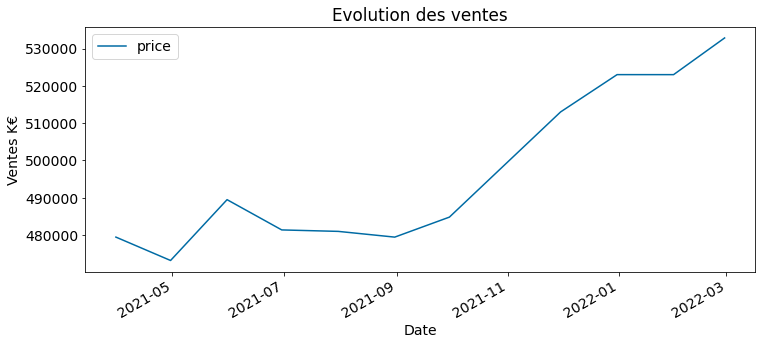

In [30]:
data.plot(x='date', y='price')

plt.title('Evolution des ventes')
plt.xlabel('Date')
plt.ylabel('Ventes K€')
plt.show()

## Mission 2 : Analyse des ventes

In [31]:
ag = []
for i in data_final['birth']:
    ag.append(2022 - int(i))
data_final['age'] = ag

<ipython-input-31-c4861bf6d234>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['age'] = ag


### Chiffre d'affaire selon le sexe

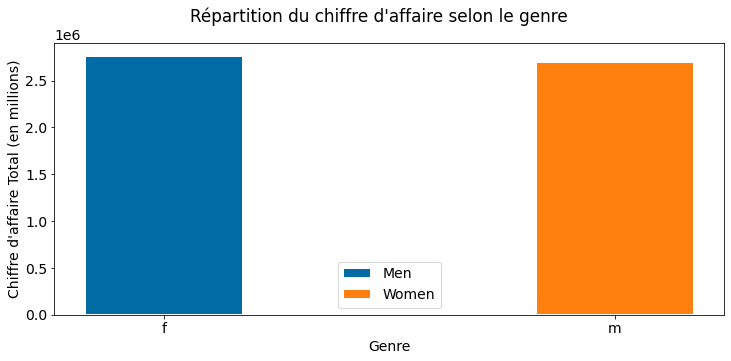

In [32]:
df_sex = data_final.groupby(pd.Grouper(key='sex')).sum().reset_index()
#df_sex = df_sex.drop(['categ'],axis=1)

labels = df_sex['sex']

x = np.arange(len(labels))  # the label locations
width = 0.35

values_m = df_sex[df_sex['sex'] == 'm']['price']
values_f = df_sex[df_sex['sex'] == 'f']['price']

fig, ax = plt.subplots()
ax.bar(0, values_m, width, label='Men',linewidth=2, edgecolor='#ffffff')
ax.bar(1, values_f, width, label='Women',linewidth=2, edgecolor='#ffffff')

#axs.bar(names,values)
fig.suptitle('Répartition du chiffre d\'affaire selon le genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Chiffre d\'affaire Total (en millions)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### Chiffre d'affaire selon les catégories de produit 

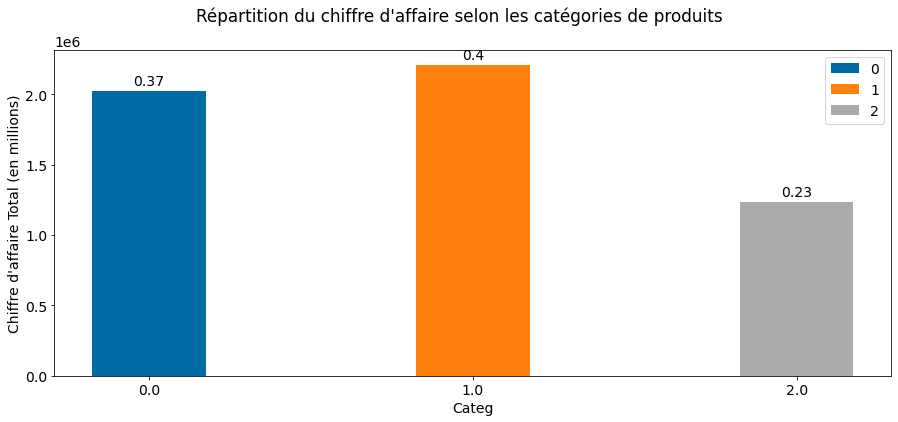

In [33]:
df_cato = data_final.groupby('categ').sum().reset_index()
df_cato['categ'] = df_cato['categ'].astype('float64')
#df_sex = df_sex.drop(['categ'],axis=1)

labels = df_cato['categ']

x = np.arange(len(labels))  # the label locations
width = 0.35

value_0 = df_cato[df_cato['categ'] == 0.0]['price']
value_1 = df_cato[df_cato['categ'] == 1.0]['price']
value_2 = df_cato[df_cato['categ'] == 2.0]['price']

toto = int(value_0)+int(value_1)+int(value_2)

fig, ax = plt.subplots(figsize = (15, 6))
rect0 = ax.bar(0, value_0, width, label='0')
rect1 = ax.bar(1, value_1, width, label='1')
rect2 = ax.bar(2, value_2, width, label='2')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = (rect.get_height())
        ax.annotate('{}'.format(np.around(int(height)/toto, decimals = 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect0)
autolabel(rect1)
autolabel(rect2)
#axs.bar(names,values)
fig.suptitle('Répartition du chiffre d\'affaire selon les catégories de produits')
ax.set_xlabel('Categ')
ax.set_ylabel('Chiffre d\'affaire Total (en millions)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


### Prix moyens par catégorie de produits

<ipython-input-34-89fab1950726>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_cat['categ'] = data_final['categ'].astype('str')


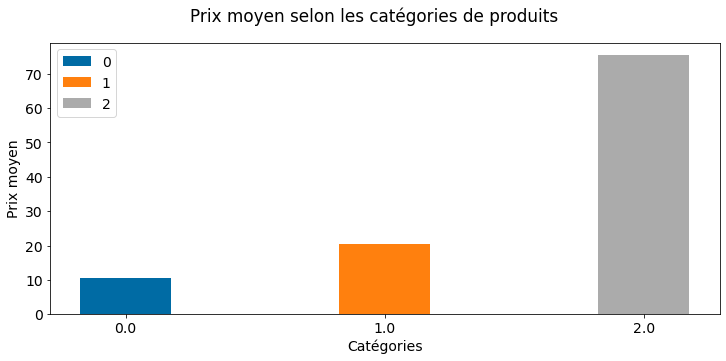

In [34]:
data_final_cat = data_final
data_final_cat['categ'] = data_final['categ'].astype('str')
df_categ = data_final_cat.groupby('categ').mean().reset_index()

labels = df_categ['categ']

x = np.arange(len(labels))  # the label locations
width = 0.35

values_0 = df_categ[df_categ['categ'] == '0.0']['price']
values_1 = df_categ[df_categ['categ'] == '1.0']['price']
values_2 = df_categ[df_categ['categ'] == '2.0']['price']

fig, ax = plt.subplots()
ax.bar(0, values_0, width, label='0')
ax.bar(1, values_1, width, label='1')
ax.bar(2, values_2, width, label='2')

#axs.bar(names,values)
fig.suptitle('Prix moyen selon les catégories de produits')
ax.set_xlabel('Catégories')
ax.set_ylabel('Prix moyen')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### Prix médian en fonction des catégories de produits

<ipython-input-149-b0004e9c3f94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_cat['categ'] = data_final['categ'].astype('str')


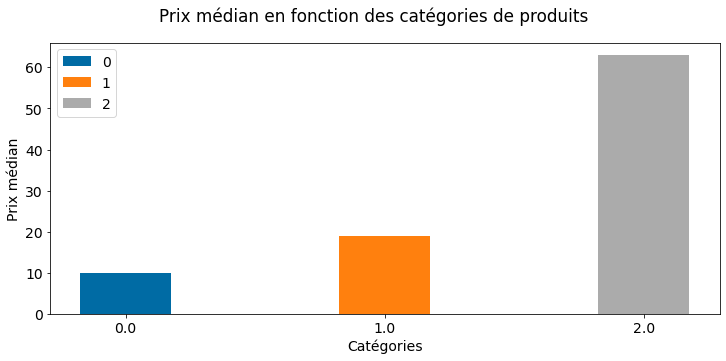

In [149]:
data_final_cat = data_final
data_final_cat['categ'] = data_final['categ'].astype('str')
df_categ = data_final_cat.groupby('categ').median().reset_index()

labels = df_categ['categ']

x = np.arange(len(labels))  # the label locations
width = 0.35

values_0 = df_categ[df_categ['categ'] == '0.0']['price']
values_1 = df_categ[df_categ['categ'] == '1.0']['price']
values_2 = df_categ[df_categ['categ'] == '2.0']['price']

fig, ax = plt.subplots()
ax.bar(0, values_0, width, label='0')
ax.bar(1, values_1, width, label='1')
ax.bar(2, values_2, width, label='2')

#axs.bar(names,values)
fig.suptitle('Prix médian en fonction des catégories de produits')
ax.set_xlabel('Catégories')
ax.set_ylabel('Prix médian')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [36]:
df_categ

,categ,price,age
0,0.0,9.99,42
1,1.0,19.08,47
2,2.0,62.83,23


###  Âge moyen des clients en fonction des catégories de produits

<ipython-input-148-a2a085a26d4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_cat['categ'] = data_final['categ'].astype('str')


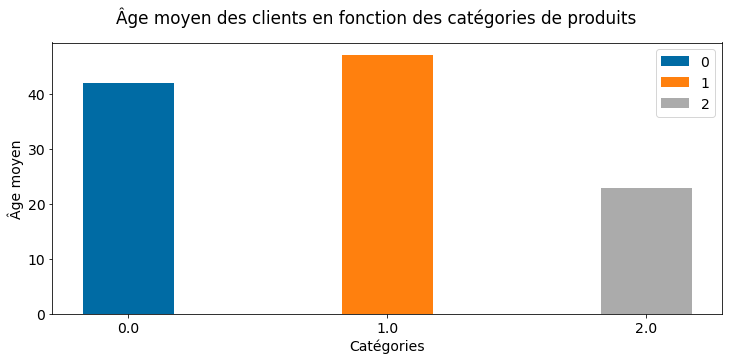

In [148]:
data_final_cat = data_final
data_final_cat['categ'] = data_final['categ'].astype('str')
df_categ = data_final_cat.groupby('categ').mean().reset_index()

labels = df_categ['categ']

x = np.arange(len(labels))  # the label locations
width = 0.35

age_0 = df_categ[df_categ['categ'] == '0.0']['age']
age_1 = df_categ[df_categ['categ'] == '1.0']['age']
age_2 = df_categ[df_categ['categ'] == '2.0']['age']

#tot = int(values_0)+int(values_1)+int(values_2)

fig, ax = plt.subplots()
ax.bar(0, values_0, width, label='0')
ax.bar(1, values_1, width, label='1')
ax.bar(2, values_2, width, label='2')

#axs.bar(names,values)
fig.suptitle('Âge moyen des clients en fonction des catégories de produits')
ax.set_xlabel('Catégories')
ax.set_ylabel('Âge moyen')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### Âge médian des clients en fonction des catégories de produits 

<ipython-input-38-68c6862e3541>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_cat['categ'] = data_final['categ'].astype('str')


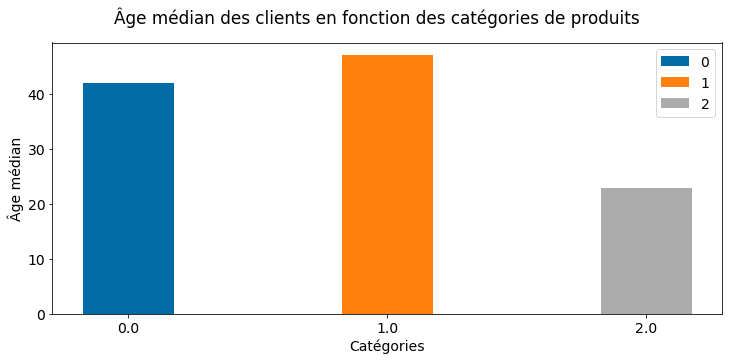

In [38]:
data_final_cat = data_final
data_final_cat['categ'] = data_final['categ'].astype('str')
df_categ = data_final_cat.groupby('categ').median().reset_index()

labels = df_categ['categ']

x = np.arange(len(labels))  # the label locations
width = 0.35

values_0 = df_categ[df_categ['categ'] == '0.0']['age']
values_1 = df_categ[df_categ['categ'] == '1.0']['age']
values_2 = df_categ[df_categ['categ'] == '2.0']['age']

fig, ax = plt.subplots()
ax.bar(0, values_0, width, label='0')
ax.bar(1, values_1, width, label='1')
ax.bar(2, values_2, width, label='2')

#axs.bar(names,values)
fig.suptitle('Âge médian des clients en fonction des catégories de produits')
ax.set_xlabel('Catégories')
ax.set_ylabel('Âge médian')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### Mode des âges

In [40]:
data_final['age'].mode()

0    42
dtype: int64

### Mode des prix des produits

In [41]:
data_final['price'].mode()

0    15.99
dtype: float64

### Distribution des âges des clients

In [42]:
prod_categ = list(data_final['categ'])
Is_categ = []

for produit in prod_categ:
           
        if produit == '0.0':
            Is_categ.append(int(1))
        elif produit != '0.0':
            if produit == '1.0':
                Is_categ.append(int(2))
            elif produit != '1.0':
                Is_categ.append(int(3))

data_final_cat['categeu'] = Is_categ

<ipython-input-42-921bdee3824e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_cat['categeu'] = Is_categ


(array([24235., 28566., 74308., 78965., 51716., 21373., 20289.,  7895.,
         5243.,  1331.]),
 array([18. , 25.5, 33. , 40.5, 48. , 55.5, 63. , 70.5, 78. , 85.5, 93. ]),
 <a list of 10 Patch objects>)

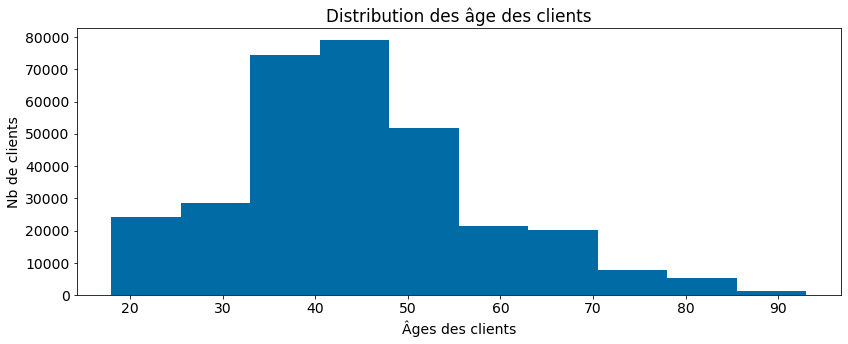

In [43]:
#N_points = list(data_final['age'])
y = (list(data_final['age']))

fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs.set_title('Distribution des âge des clients')
axs.set_xlabel('Âges des clients')
axs.set_ylabel('Nb de clients')
axs.hist(y)

In [44]:
data_final['age']

0         55
1         38
2         45
3         35
4         40
          ..
336832    26
336833    24
336834    31
336835    38
336836    50
Name: age, Length: 313921, dtype: int64

L'âge des clients se concentre autour 35-55 ans. Nous avons presque plus de clients âgé entre 18 et 35 ans et que de clients entre 55 et 95 ans.  

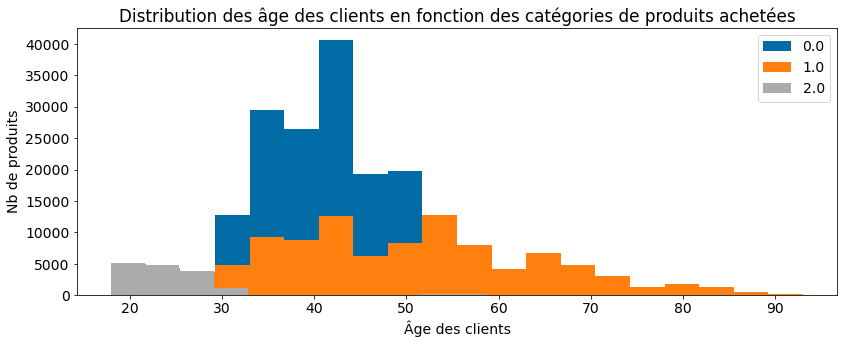

In [45]:
#N_points = list(data_final['age'])
nb_bins = 20

h1 = data_final_cat[data_final_cat['categeu'] == 1]['age']
h2 = data_final_cat[data_final_cat['categeu'] == 2]['age']
h3 = data_final_cat[data_final_cat['categeu'] == 3]['age']

fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs.set_title('Distribution des âge des clients en fonction des catégories de produits achetées')
axs.set_xlabel('Âge des clients')
axs.set_ylabel('Nb de produits')
axs.hist(h1, bins = nb_bins, label = '0.0')
axs.hist(h2, bins = nb_bins, label = '1.0')
axs.hist(h3, bins = nb_bins, label = '2.0')
axs.legend()

Les produits de catégories 2 sont achetés exclusivement par des personnes âgées entre 18 à 35 ans. Par conséquent, la catégorie des 18-35 ans ne représente seulement 22% du chiffre d'affaire. En outre, la catégorie de produit 2 représente un nombre de produit vendu très réduit. Au contraire, la catégorie de produit 2 a plus de potentiel. En effet, cette catégorie a un panel de client très élargi (entre 35 et 95 ans). Les prix ne sont pas aussi important que pour les catégories de produits 3 mais par la largeur du panel de client touché, cette catégorie peut bénéficier d'un effet de levier important.

### Distribution des prix des produits en fonction des catégories de produits

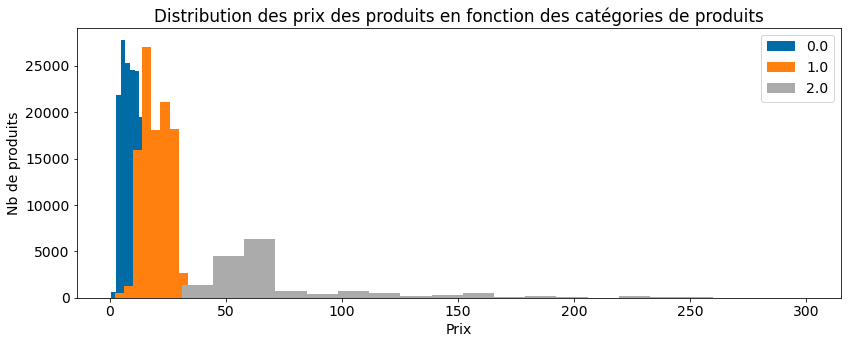

In [46]:
#N_points = list(data_final['age'])
nb_bins = 20

h1 = data_final_cat[data_final_cat['categeu'] == 1]['price']
h2 = data_final_cat[data_final_cat['categeu'] == 2]['price']
h3 = data_final_cat[data_final_cat['categeu'] == 3]['price']

fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs.set_title('Distribution des prix des produits en fonction des catégories de produits')
axs.set_xlabel('Prix')
axs.set_ylabel('Nb de produits')
axs.hist(h1, bins = nb_bins, label = '0.0')
axs.hist(h2, bins = nb_bins, label = '1.0')
axs.hist(h3, bins = nb_bins, label = '2.0')
axs.legend()

In [47]:
data_final_cat[data_final_cat['categeu'] == 3].sort_values(by='price',ascending = True)['price'].iloc[250:1500]

285356    41.31
285313    41.31
285355    41.31
285354    41.31
285353    41.31
          ...  
277540    46.31
277541    46.31
277542    46.31
277510    46.31
277474    46.31
Name: price, Length: 1250, dtype: float64

### Nombre de produit en vente en fonction des catégories de produits 

<ipython-input-48-8fae2e5bf653>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_cat['categ'] = data_final['categ'].astype('str')


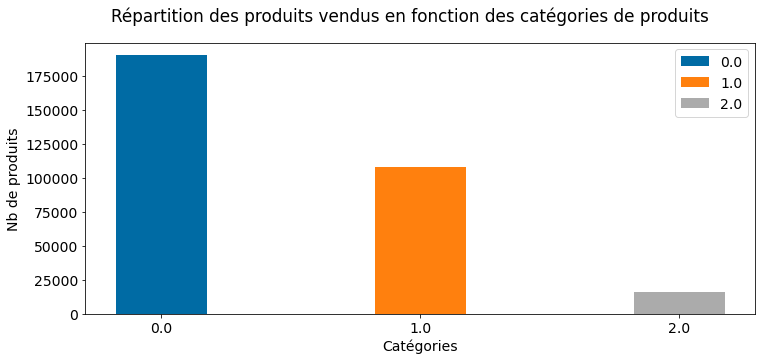

In [48]:
data_final_cat = data_final
data_final_cat['categ'] = data_final['categ'].astype('str')
df_categ = data_final_cat.groupby('categ').sum().reset_index()

labels = df_categ['categ']

x = np.arange(len(labels))  # the label locations
width = 0.35

vals_0 = df_categ[df_categ['categ'] == '0.0']['categeu']
vals_1 = df_categ[df_categ['categ'] == '1.0']['categeu']/2
vals_2 = df_categ[df_categ['categ'] == '2.0']['categeu']/3

fig, ax = plt.subplots()
ax.bar(0, vals_0, width, label='0.0')
ax.bar(1, vals_1, width, label='1.0')
ax.bar(2, vals_2, width, label='2.0')

#axs.bar(names,values)
fig.suptitle('Répartition des produits vendus en fonction des catégories de produits')
ax.set_xlabel('Catégories')
ax.set_ylabel('Nb de produits')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### Répartition du chiffre d'affaire en fonction des catégories et du nombre de produit vendu 

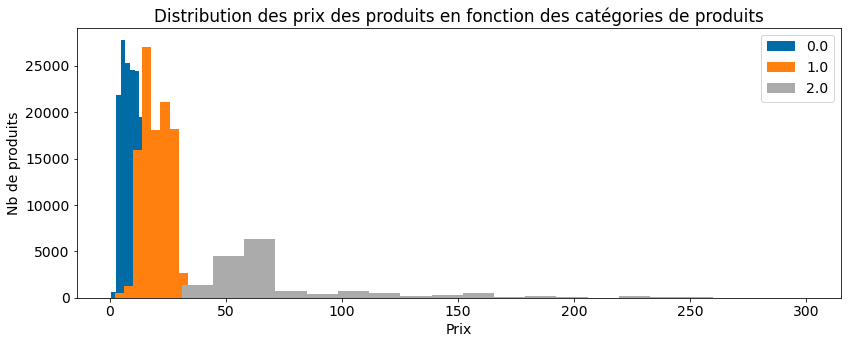

In [49]:
#N_points = list(data_final['age'])
nb_bins = 20

h1 = data_final_cat[data_final_cat['categeu'] == 1]['price']
h2 = data_final_cat[data_final_cat['categeu'] == 2]['price']
h3 = data_final_cat[data_final_cat['categeu'] == 3]['price']

fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs.set_title('Distribution des prix des produits en fonction des catégories de produits')
axs.set_xlabel('Prix')
axs.set_ylabel('Nb de produits')
axs.hist(h1, bins = nb_bins, label = '0.0')
axs.hist(h2, bins = nb_bins, label = '1.0')
axs.hist(h3, bins = nb_bins, label = '2.0')
axs.legend()

### Palmarès client

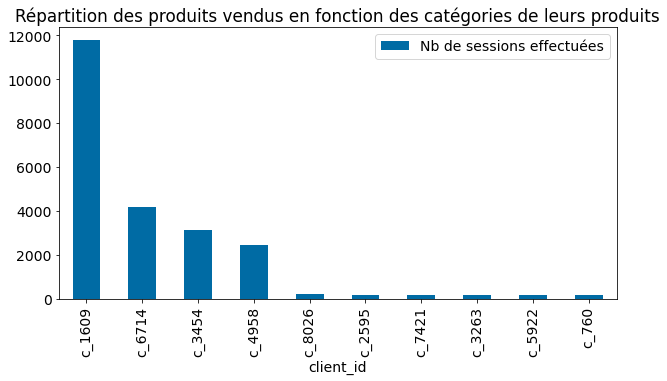

In [50]:
df = data_final.groupby('client_id').count().reset_index()
df = df[['client_id','session_id']]
df = df.sort_values(by='session_id', ascending = False).iloc[0:10]

df.plot(x='client_id',y='session_id',kind='bar', figsize = [10,5], title='Répartition des produits vendus en fonction des catégories de leurs produits',label = 'Nb de sessions effectuées')

### Fidélité

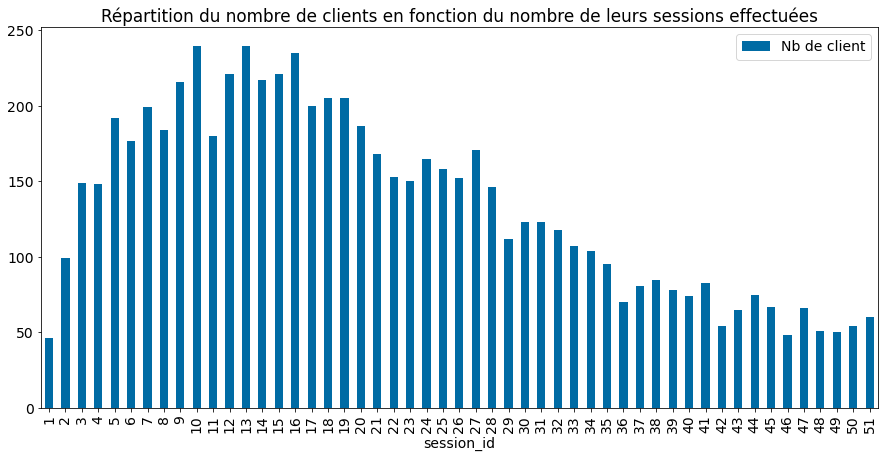

In [51]:
data_fin_tran = data_final.groupby('client_id').count().reset_index()
data_fin_tran = data_fin_tran[['client_id','session_id']]
dat_tran = data_fin_tran.groupby('session_id').count().reset_index()
dat_tran_hist = dat_tran.loc[0:50].plot(x='session_id',y='client_id',kind='bar', figsize = [15,7], title='Répartition du nombre de clients en fonction du nombre de leurs sessions effectuées',label = 'Nb de client')

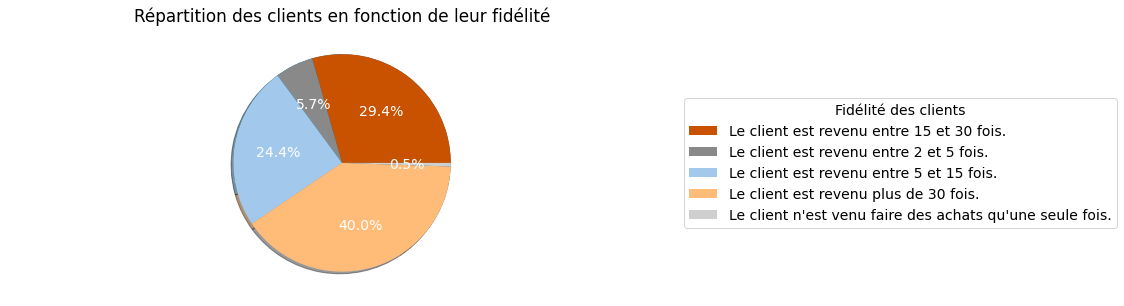

In [52]:
session_id = list(dat_tran['session_id'])
transat = []
dat_categ_0 = dat_tran
 
for session in session_id:
    if session == 1:
        transat.append('Le client n\'est venu faire des achats qu\'une seule fois.')
    elif (session > 2)&(session <= 5): 
        transat.append('Le client est revenu entre 2 et 5 fois.')
    elif (session > 5)&(session <= 15):
        transat.append('Le client est revenu entre 5 et 15 fois.')
    elif (session > 15)&(session <= 30):
        transat.append('Le client est revenu entre 15 et 30 fois.')
    else:
        transat.append('Le client est revenu plus de 30 fois.')

dat_categ_0['transc'] = transat
dat_fin_cat0 = dat_categ_0.groupby('transc').sum().reset_index()

sizes1 = dat_fin_cat0['client_id']

dfidele = dat_fin_cat0['transc']

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, shadow=True, startangle=90)
#ax1.pie(sizes2, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax1.pie(sizes1, autopct=lambda pct: func(pct, sizes1), textprops=dict(color="w"))

ax1.legend(wedges, dfidele, title="Fidélité des clients", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax1.set_title('Répartition des clients en fonction de leur fidélité')

plt.show()
#print('0 : Le client n\'est venu faire des achats qu\'une seule fois.')
#print('1 : Le client est revenu entre 2 et 5 fois.')
#print('2 : Le client est revenu entre 5 et 15 fois.')
#print('3 : Le client est revenu entre 15 et 30 fois.')
#print('4 : Le client est revenu plus de 30 fois.')

### Fidélité / catégorie 0

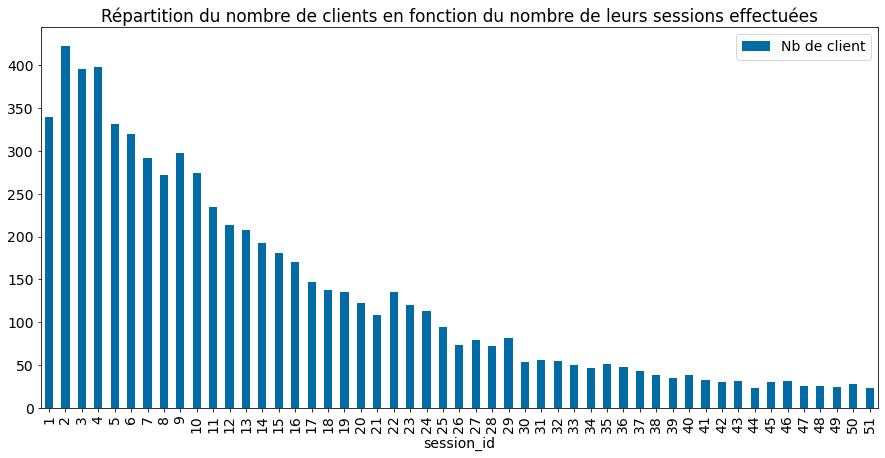

In [53]:
data_tran_categ0 = data_final[data_final['categ'] == '0.0'].groupby('client_id').count().reset_index()
data_tran_categ0 = data_tran_categ0[['client_id','session_id']]
dat_tran_0 = data_tran_categ0.groupby('session_id').count().reset_index()
dat_tran_hist_0 = dat_tran_0.loc[0:50].plot(x='session_id',y='client_id',kind='bar', figsize = [15,7], title='Répartition du nombre de clients en fonction du nombre de leurs sessions effectuées',label = 'Nb de client')

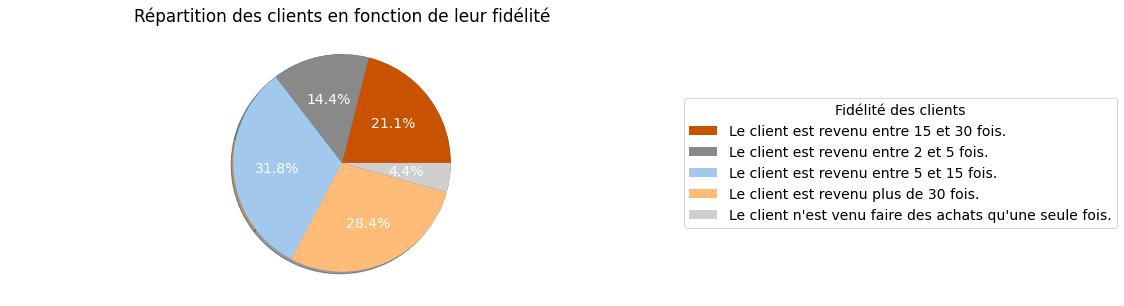

In [54]:
session_id = list(dat_tran_0['session_id'])
transat = []
dat_categ_0 = dat_tran_0
 
for session in session_id:
    if session == 1:
        transat.append('Le client n\'est venu faire des achats qu\'une seule fois.')
    elif (session > 2)&(session <= 5): 
        transat.append('Le client est revenu entre 2 et 5 fois.')
    elif (session > 5)&(session <= 15):
        transat.append('Le client est revenu entre 5 et 15 fois.')
    elif (session > 15)&(session <= 30):
        transat.append('Le client est revenu entre 15 et 30 fois.')
    else:
        transat.append('Le client est revenu plus de 30 fois.')
dat_categ_0['transc'] = transat
dat_fin_cat0 = dat_categ_0.groupby('transc').sum().reset_index()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes1 = dat_fin_cat0['client_id']

dfidele = dat_fin_cat0['transc']

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, shadow=True, startangle=90)
#ax1.pie(sizes2, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax1.pie(sizes1, autopct=lambda pct: func(pct, sizes1), textprops=dict(color="w"))

ax1.legend(wedges, dfidele, title="Fidélité des clients", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax1.set_title('Répartition des clients en fonction de leur fidélité')

plt.show()

### Fidélité / catégorie 1 

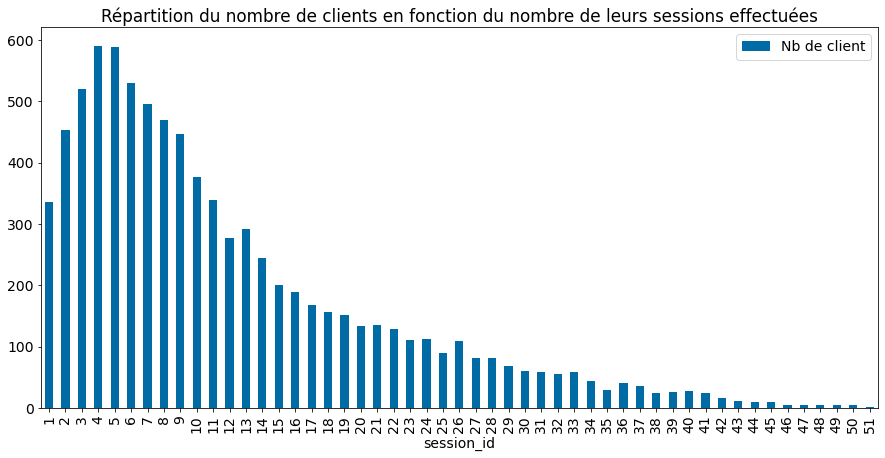

In [55]:
data_tran_categ1 = data_final[data_final['categ'] == '1.0'].groupby('client_id').count().reset_index()
data_tran_categ1 = data_tran_categ1[['client_id','session_id']]
dat_tran_1 = data_tran_categ1.groupby('session_id').count().reset_index()
dat_tran_hist_1 = dat_tran_1.loc[0:50].plot(x='session_id',y='client_id',kind='bar', figsize = [15,7], title='Répartition du nombre de clients en fonction du nombre de leurs sessions effectuées',label = 'Nb de client')

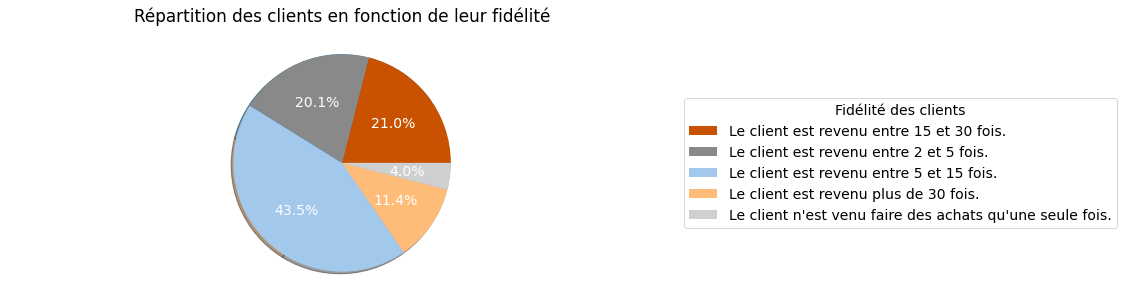

In [56]:
session_id = list(dat_tran_1['session_id'])
transat = []
dat_categ_1 = dat_tran_1
 
for session in session_id:
    if session == 1:
        transat.append('Le client n\'est venu faire des achats qu\'une seule fois.')
    elif (session > 2)&(session <= 5): 
        transat.append('Le client est revenu entre 2 et 5 fois.')
    elif (session > 5)&(session <= 15):
        transat.append('Le client est revenu entre 5 et 15 fois.')
    elif (session > 15)&(session <= 30):
        transat.append('Le client est revenu entre 15 et 30 fois.')
    else:
        transat.append('Le client est revenu plus de 30 fois.')
dat_categ_1['transc'] = transat
dat_fin_cat1 = dat_categ_1.groupby('transc').sum().reset_index()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes1 = dat_fin_cat1['client_id']

dfidele = dat_fin_cat1['transc']

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, shadow=True, startangle=90)
#ax1.pie(sizes2, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax1.pie(sizes1, autopct=lambda pct: func(pct, sizes1), textprops=dict(color="w"))

ax1.legend(wedges, dfidele, title="Fidélité des clients", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax1.set_title('Répartition des clients en fonction de leur fidélité')

plt.show()

### Fidélité / catégorie 2

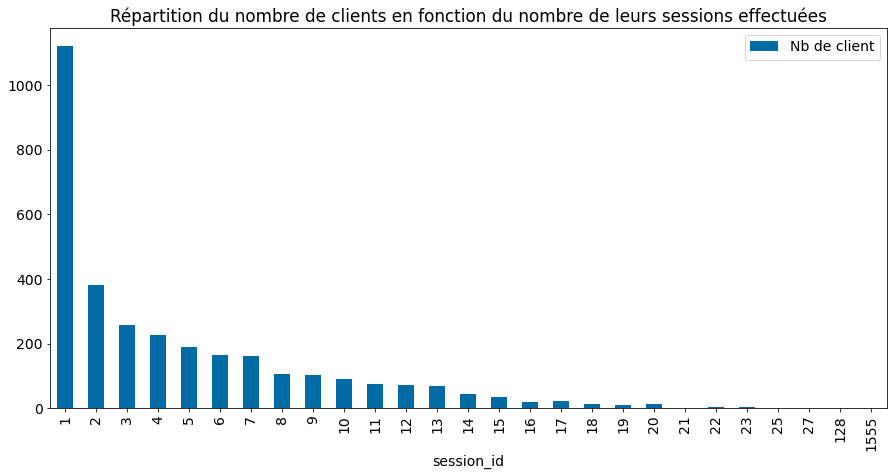

In [57]:
data_tran_categ2 = data_final[data_final['categ'] == '2.0'].groupby('client_id').count().reset_index()
data_tran_categ2 = data_tran_categ2[['client_id','session_id']]
dat_tran_2 = data_tran_categ2.groupby('session_id').count().reset_index()
dat_tran_hist_2 = dat_tran_2.loc[0:50].plot(x='session_id',y='client_id',kind='bar', figsize = [15,7], title='Répartition du nombre de clients en fonction du nombre de leurs sessions effectuées',label = 'Nb de client')

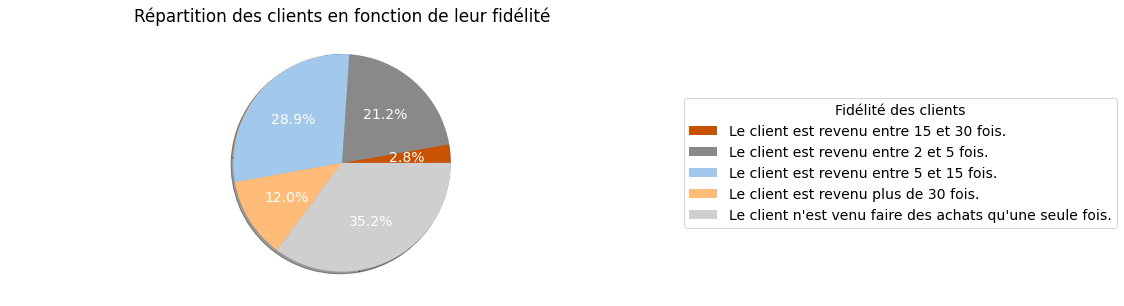

In [58]:
session_id = list(dat_tran_2['session_id'])
transat = []
dat_categ_2 = dat_tran_2
 
for session in session_id:
    if session == 1:
        transat.append('Le client n\'est venu faire des achats qu\'une seule fois.')
    elif (session > 2)&(session <= 5): 
        transat.append('Le client est revenu entre 2 et 5 fois.')
    elif (session > 5)&(session <= 15):
        transat.append('Le client est revenu entre 5 et 15 fois.')
    elif (session > 15)&(session <= 30):
        transat.append('Le client est revenu entre 15 et 30 fois.')
    else:
        transat.append('Le client est revenu plus de 30 fois.')
dat_categ_2['transc'] = transat
dat_fin_cat2 = dat_categ_2.groupby('transc').sum().reset_index()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes1 = dat_fin_cat2['client_id']

dfidele = dat_fin_cat2['transc']

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, shadow=True, startangle=90)
#ax1.pie(sizes2, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax1.pie(sizes1, autopct=lambda pct: func(pct, sizes1), textprops=dict(color="w"))

ax1.legend(wedges, dfidele, title="Fidélité des clients", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax1.set_title('Répartition des clients en fonction de leur fidélité')

plt.show()

### Courbe de Lorenz

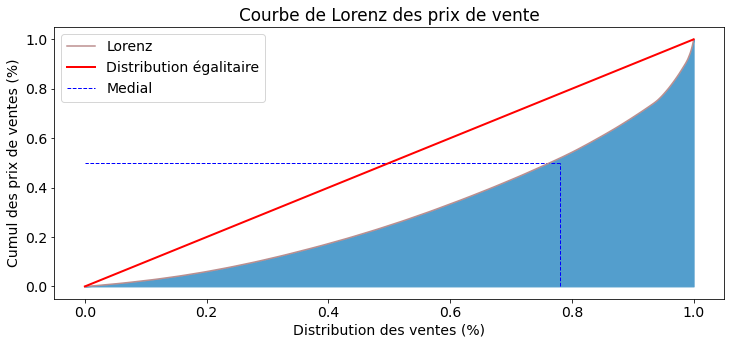

In [59]:
depenses = data_final
#Courbe de Lorenz sur la variables des prix
price = depenses['price'].values
#Sélection du sous-échantillon de travail que l'on appelle price

#On place les observations dans une variable
lorenz_price = np.cumsum(np.sort(price)) / price.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#calcul de la somme cumulée et normalisation en divisant par la somme des observations
n = len(price)

plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.78, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.78, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc='upper left')
plt.show()


### Indice de Gini

In [128]:
AUC = (lorenz_price.sum() -lorenz_price[-1]/2 -lorenz_price[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
np.around(gini,decimals = 2)

0.39

### Courbe de lorenz / catégorie 0 

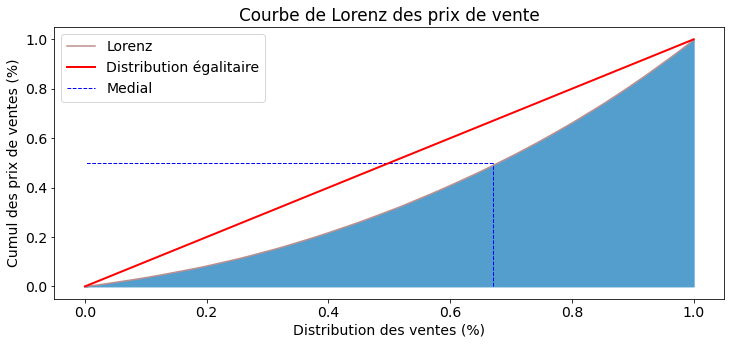

In [143]:
depenses0 = data_final[data_final['categ'] == '0.0']
#Courbe de Lorenz sur la variables des prix
price0 = depenses0['price'].values
#Sélection du sous-échantillon de travail que l'on appelle price

#On place les observations dans une variable
lorenz_categ_0 = np.cumsum(np.sort(price0)) / price0.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#calcul de la somme cumulée et normalisation en divisant par la somme des observations
n = len(price0)

plt.plot(np.linspace(0,1,len(lorenz_categ_0)), lorenz_categ_0, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_categ_0)) ,lorenz_categ_0 , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.67, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.67, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc='upper left')
plt.show()

### Indice de Gini / catégorie 0

In [144]:
AUC = (lorenz_categ_0.sum() -lorenz_categ_0[-1]/2 -lorenz_categ_0[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
np.around(gini,decimals = 2)

0.26

### Ecart-type empirique / catégorie 0

In [63]:
depenses0['price'].values.std(ddof=0)

4.931843964408138

### Courbe de lorenz / catégorie 1 

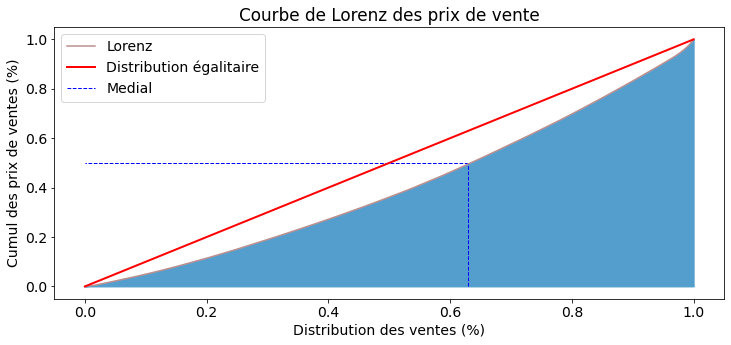

In [142]:
depenses1 = data_final[data_final['categ'] == '1.0']
#Courbe de Lorenz sur la variables des prix
price1 = depenses1['price'].values
#Sélection du sous-échantillon de travail que l'on appelle price

#On place les observations dans une variable
lorenz_categ_1 = np.cumsum(np.sort(price1)) / price1.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#calcul de la somme cumulée et normalisation en divisant par la somme des observations
n = len(price1)

plt.plot(np.linspace(0,1,len(lorenz_categ_1)), lorenz_categ_1, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_categ_1)) ,lorenz_categ_1 , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.63, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.63, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc='upper left')
plt.show()

### Indice de Gini / catégorie 1

In [145]:
AUC = (lorenz_categ_1.sum() -lorenz_categ_1[-1]/2 -lorenz_categ_1[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
np.around(gini,decimals = 2)

0.54

### Ecart-type empirique / catégorie 1

In [66]:
depenses1['price'].values.std(ddof=0)

7.576143025036796

### Courbe de lorenz / catégorie 2

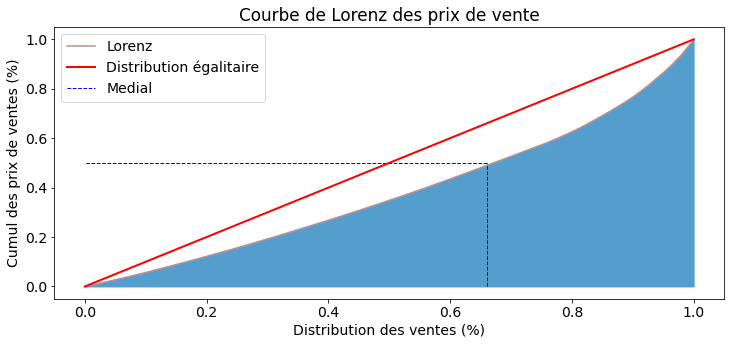

In [146]:
depenses2 = data_final[data_final['categ'] == '2.0']
#Courbe de Lorenz sur la variables des prix
price2 = depenses2['price'].values
#Sélection du sous-échantillon de travail que l'on appelle price

#On place les observations dans une variable
lorenz_categ_2 = np.cumsum(np.sort(price2)) / price2.sum()

#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#calcul de la somme cumulée et normalisation en divisant par la somme des observations
n = len(price2)

plt.plot(np.linspace(0,1,len(lorenz_categ_2)), lorenz_categ_2, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_categ_2)) ,lorenz_categ_2 , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.66, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.66, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc='upper left')
plt.show()

### Indice de Gini / catégorie 2

In [147]:
AUC = (lorenz_categ_2.sum() -lorenz_categ_2[-1]/2 -lorenz_categ_2[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
np.around(gini,decimals = 2)

0.24

### Ecart-type empirique / catégorie 2

In [69]:
depenses2['price'].values.std(ddof=0)

39.20628292798402

## Mission 2 : Corrélations

### Corrélation entre le sexe des clients et les catégories de produits achetées 

In [70]:
X = "sex"
Y = "categ"

chi_test = data_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
chi_test2 = data_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=False,margins_name="Total")
chi_test

categ,0.0,1.0,2.0,Total
sex,,,,
f,94273,54497,7693,156463
m,95548,53230,8680,157458
Total,189821,107727,16373,313921


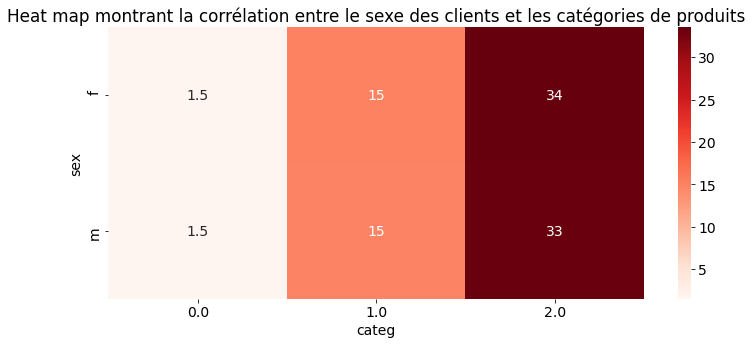

In [71]:
ta = chi_test.loc[:,["Total"]]
tb = chi_test.loc[["Total"],:]
n = len(data_final)
ind = ta.dot(tb) / n

c = chi_test.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-ind)**2/ind
xi_n = measure.sum().sum()
table1 = (measure/xi_n)*100
sns.heatmap(table1.iloc[0:2,0:-1],annot=True, cmap='Reds')
plt.title('Heat map montrant la corrélation entre le sexe des clients et les catégories de produits')
plt.show()
chi2, pvalue, degrees, expected = st.chi2_contingency(chi_test2)

In [72]:
print('p = valeurs à tester')
print('p0 = valeurs témoin')
print('_ _'*20)
print(' '*10)
print('H0 : p = p0')
print(' '*10)
print('H1 : p ≠ p0')
print(' '*10)
print('-'*10)
print(' '*10)
print('Degré de liberté = ',degrees)
print(' '*10)
print('X² =',chi2)
print(' '*10)
print('-'*10)
print(' '*10)
print('Pour un risque α de 0.1, VC =', 4,61)
print('-'*3)
print('Pour un risque α de 0.05, VC =', 5.99)
print('-'*3)
print('Pour un risque α de 0.025, VC =', 7.38)
print('-'*3)
print('Pour un risque α de 0.005, VC =', 10.60)
print('-'*3)
print('Pour un risque α de 0.001, VC =', 13.82)
print(' '*10)
print('='*50)
print(' '*10)
print('VC < X²')
print(' '*10)
print('-'*10)
print(' '*10)
print('Rejet de H0')
print(' '*10)
print('-'*10)
print(' '*10)
print('P-Value =',pvalue)
print(' '*10)
print('La P-Value est inférieure à 0,1.')
print('La P-Value confirme le rejet de H0')

p = valeurs à tester
p0 = valeurs témoin
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
          
H0 : p = p0
          
H1 : p ≠ p0
          
----------
          
Degré de liberté =  2
          
X² = 79.81100995627219
          
----------
          
Pour un risque α de 0.1, VC = 4 61
---
Pour un risque α de 0.05, VC = 5.99
---
Pour un risque α de 0.025, VC = 7.38
---
Pour un risque α de 0.005, VC = 10.6
---
Pour un risque α de 0.001, VC = 13.82
          
          
VC < X²
          
----------
          
Rejet de H0
          
----------
          
P-Value = 4.6693818453498565e-18
          
La P-Value est inférieure à 0,1.
La P-Value confirme le rejet de H0


Par conséquent, à travers ce test statistique, on peut donc conclure qu'il y a bien une corrélation entre le sexe des clients et la catégorie de produit achetée.

In [73]:
# Outliers

depenses = data_final.groupby(['client_id','age']).sum().reset_index()
print('4 clients les plus fidèles :')
print(' '*10)
print(depenses[(depenses['client_id'] == 'c_1609')|(depenses['client_id'] =='c_4958')|(depenses['client_id'] == 'c_6714')|(depenses['client_id'] == 'c_3454')])
print(' '*10)
print('-'*50)
print(' '*10)
print(depenses[depenses['age'] == 49].sort_values(by = 'price',ascending = False).iloc[0:50])
#depenses.groupby(['age']).count().reset_index()

4 clients les plus fidèles :
          
     client_id  age          price  categeu
677     c_1609   42  150221.600000    14327
2723    c_3454   53   52614.104144     5056
4387    c_4958   23  136786.570000     6459
6336    c_6714   54   69104.204144     6079
          
--------------------------------------------------
          
     client_id  age        price  categeu
1709    c_2538   49  2032.550000      190
1135    c_2020   49  1826.280000      168
7408    c_7683   49  1795.190000      179
2698    c_3430   49  1777.270000      161
2575     c_332   49  1637.800000      158
7502    c_7768   49  1631.530000      151
2646    c_3384   49  1602.270000      164
7367    c_7646   49  1573.680000      151
661     c_1595   49  1546.597072      125
7709    c_7954   49  1543.497072      150
2464    c_3219   49  1489.800000      138
3828    c_4454   49  1355.480000      131
4469    c_5030   49  1352.680000      123
2167    c_2951   49  1336.150000      121
1264    c_2137   49  1318.650000     

Le nombre de personnes ayant plus 1 000 € d'achats parmi les personnes âgées de 18 ans sont beaucoup plus importants que les autres âges ce qui engendre un outlier où les montants des achats culminent à plus de 25 000 alors que les autres valeurs dépassent difficilement 15 000 

Par conséquent, ne pouvant fournir d'explications pertinentes, nous allons supprimer la part des personnes de 18 ans.

### Corrélation entre l'âge et le prix

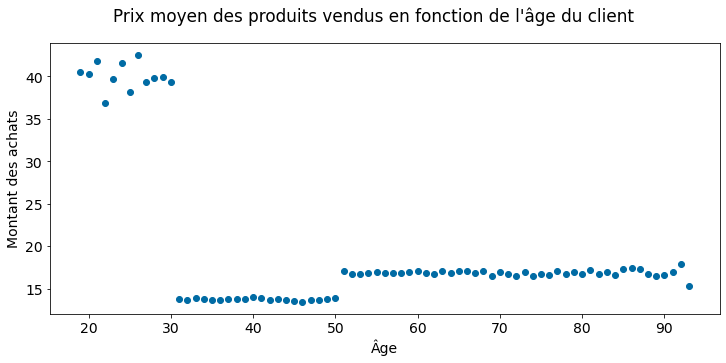

In [151]:
depenses = data_final.groupby(['client_id','age','price']).sum()
depenses = depenses.drop(['c_1609','c_4958','c_6714','c_3454'],axis = 0) # Outliers
depenses = depenses.reset_index()
depenses = depenses.groupby(['age']).mean()
depenses = depenses.drop([18],axis = 0) # Outliers
dep = depenses.reset_index()
plt.plot(dep["age"],dep["price"],'o')
plt.suptitle("Prix moyen des produits vendus en fonction de l'âge du client")
plt.xlabel("Âge")
plt.ylabel("Montant des achats")
plt.show()

#### Prix / Tranche 31-95 ans

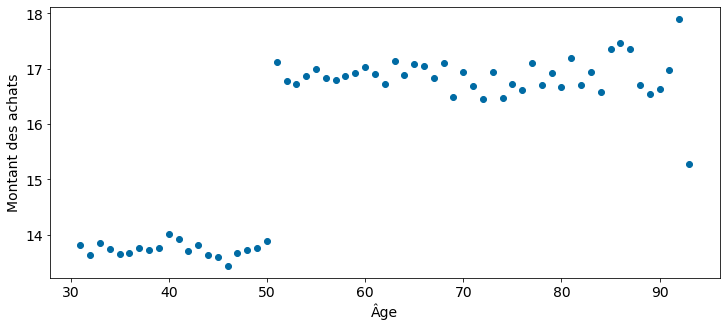

21.077999125705432
0.7792191198958551


In [75]:
dep0 = dep[(dep['age'] >= 31)&(dep['age'] <= 95)]
plt.plot(dep0["age"],dep0["price"],'o')
plt.xlabel("Âge")
plt.ylabel("Montant des achats")
plt.show()
print(np.cov(dep0["age"],dep0["price"],ddof=0)[1,0])
print(st.pearsonr(dep0["age"],dep0["price"])[0])

In [76]:
print('Global :')
print(' '*50)
print('Covariance empirique = ',np.cov(dep["age"],dep["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep["age"],dep["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 18-30 ans :')
print(' '*50)
dep0 = dep[(dep['age'] >= 18)&(dep['age'] <= 30)]
print('Covariance empirique = ',np.cov(dep0["age"],dep0["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep0["age"],dep0["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 30-50 ans :')
print(' '*50)
dep1 = dep[(dep['age'] >= 31)&(dep['age'] <= 50)]
print('Covariance empirique = ',np.cov(dep1["age"],dep1["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep1["age"],dep1["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 50-70 ans :')
print(' '*50)
dep2 = dep[(dep['age'] >= 51)&(dep['age'] <= 70)]
print('Covariance empirique = ',np.cov(dep2["age"],dep2["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep2["age"],dep2["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 70-95 ans :')
print(' '*50)
dep3 = dep[(dep['age'] >= 71)&(dep['age'] <= 95)]
print('Covariance empirique = ',np.cov(dep3["age"],dep3["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep3["age"],dep3["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 31-95 ans :')
print(' '*50)
dep4 = dep[(dep['age'] >= 31)&(dep['age'] <= 95)]
print('Covariance empirique = ',np.cov(dep4["age"],dep4["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep4["age"],dep4["price"])[0])

Global :
                                                  
Covariance empirique =  -103.9410856328753
Coefficient de corrélation de Pearson =  -0.5354724764453541
                                                  
--------------------------------------------------
                                                  
Tranche 18-30 ans :
                                                  
Covariance empirique =  -0.5660699174930486
Coefficient de corrélation de Pearson =  -0.10957535063599576
                                                  
--------------------------------------------------
                                                  
Tranche 30-50 ans :
                                                  
Covariance empirique =  -0.08332608451428954
Coefficient de corrélation de Pearson =  -0.11650372510838777
                                                  
--------------------------------------------------
                                                  
Tranche 50-70 ans :
  

### Corrélation entre l'âge et le montant total des achats 

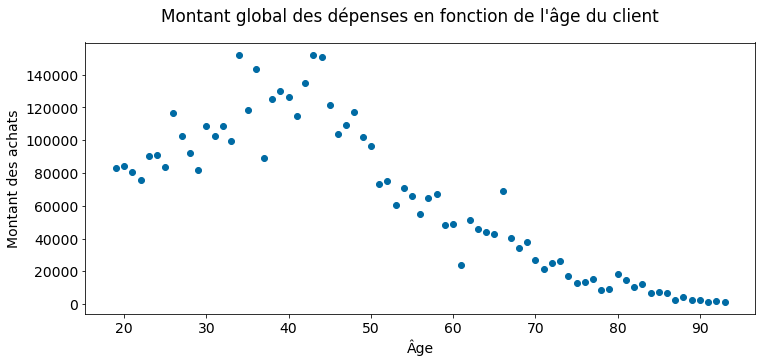

In [153]:
depenses = data_final.groupby(['client_id','age']).sum()
depenses = depenses.drop(['c_1609','c_4958','c_6714','c_3454'],axis = 0) # Outliers
depenses = depenses.reset_index()
depenses = depenses.groupby(['age']).sum()
depenses = depenses.drop([18],axis = 0) # Outliers
depenses = depenses.reset_index()
plt.plot(depenses["age"],depenses["price"],'o')
plt.suptitle("Montant global des dépenses en fonction de l'âge du client")
plt.xlabel("Âge")
plt.ylabel("Montant des achats")
plt.show()

In [79]:
print('Covariance empirique = ',np.cov(depenses["age"],depenses["price"],ddof=0)[1,0])
print(' '*10)

print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(depenses["age"],depenses["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 1')
print('Les valeurs suivent une distribution linéaire')

Covariance empirique =  -836846.5978109261
          
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  -0.8522666503157621
          
Le coefficient de corrélation de Pearson est proche de 1
Les valeurs suivent une distribution linéaire


#### Montant des achats / Tranche 18-30 ans

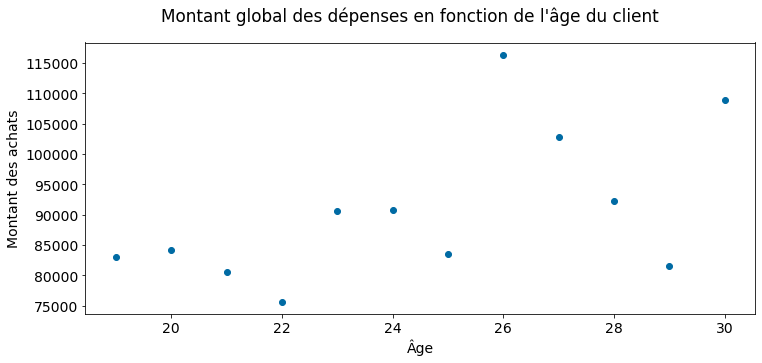

In [154]:
dep_tranche = depenses[(depenses['age'] >= 18)&(depenses['age'] <= 30)]

plt.plot(dep_tranche["age"],dep_tranche["price"],'o')
plt.suptitle("Montant global des dépenses en fonction de l'âge du client")
plt.xlabel("Âge")
plt.ylabel("Montant des achats")
plt.show()

In [81]:
print('Covariance empirique = ',np.cov(dep_tranche["age"],dep_tranche["price"],ddof=0)[1,0])
print(' '*10)
print('La covariance ')
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep_tranche["age"],dep_tranche["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 0')
print('Les valeurs suivent une distribution non-linéaire')

Covariance empirique =  22889.921708002475
          
La covariance 
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  0.5563756631187549
          
Le coefficient de corrélation de Pearson est proche de 0
Les valeurs suivent une distribution non-linéaire


#### Montant des achats / Tranche 30-50 ans

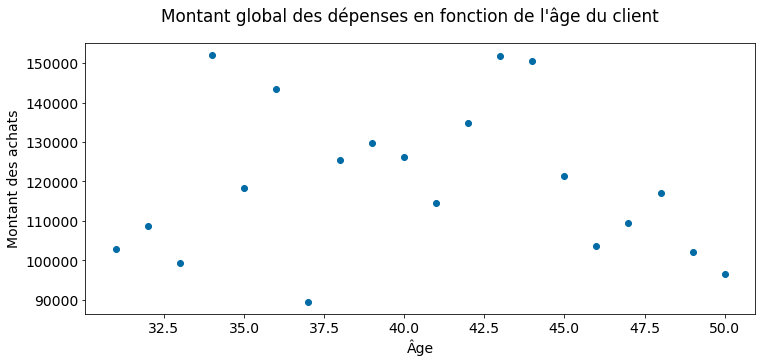

In [156]:
dep_tranche1 = depenses[(depenses['age'] > 30)&(depenses['age'] <= 50)]

plt.plot(dep_tranche1["age"],dep_tranche1["price"],'o')
plt.suptitle("Montant global des dépenses en fonction de l'âge du client")
plt.xlabel("Âge")
plt.ylabel("Montant des achats")
plt.show()

In [83]:
print('Covariance empirique = ',np.cov(dep_tranche1["age"],dep_tranche1["price"],ddof=0)[1,0])
print(' '*10)
print('La covariance ')
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep_tranche1["age"],dep_tranche1["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 0')
print('Les valeurs suivent une distribution non-linéaire')

Covariance empirique =  -2293.121143638798
          
La covariance 
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  -0.02057182056732204
          
Le coefficient de corrélation de Pearson est proche de 0
Les valeurs suivent une distribution non-linéaire


#### Montant des achats / Tranche 50-70 ans

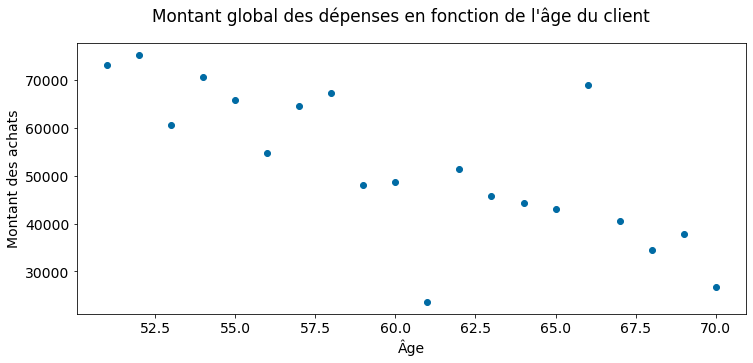

In [160]:
dep_tranche2 = depenses[(depenses['age'] > 50)&(depenses['age'] <= 70)]

plt.plot(dep_tranche2["age"],dep_tranche2["price"],'o')
plt.suptitle("Montant global des dépenses en fonction de l'âge du client")
plt.xlabel("Âge")
plt.ylabel("Montant des achats")
plt.show()

In [85]:
print('Covariance empirique = ',np.cov(dep_tranche2["age"],dep_tranche2["price"],ddof=0)[1,0])
print(' '*10)
print('La covariance ')
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep_tranche2["age"],dep_tranche2["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 0')
print('Les valeurs suivent une distribution non-linéaire')

Covariance empirique =  -83934.11482817805
          
La covariance 
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  -0.7908729687464142
          
Le coefficient de corrélation de Pearson est proche de 0
Les valeurs suivent une distribution non-linéaire


#### Montant des achats / Tranche 70-95 ans

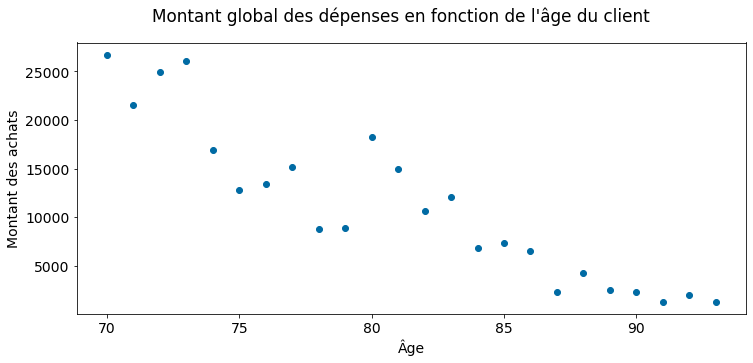

In [159]:
dep_tranche3 = depenses[(depenses['age'] > 70)&(depenses['age'] <= 95)]

plt.plot(dep_tranche3["age"],dep_tranche3["price"],'o')
plt.suptitle("Montant global des dépenses en fonction de l'âge du client")
plt.xlabel("Âge")
plt.ylabel("Montant des achats")
plt.show()

In [87]:
print('Covariance empirique = ',np.cov(dep_tranche3["age"],dep_tranche3["price"],ddof=0)[1,0])
print(' '*10)
print('La covariance ')
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep_tranche3["age"],dep_tranche3["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 0')
print('Les valeurs suivent une distribution non-linéaire')

Covariance empirique =  -50416.74187399637
          
La covariance 
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  -0.9186870763044166
          
Le coefficient de corrélation de Pearson est proche de 0
Les valeurs suivent une distribution non-linéaire


In [88]:
print('Global :')
print(' '*50)
print('Covariance empirique = ',np.cov(depenses["age"],depenses["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(depenses["age"],depenses["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 18-30 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(dep_tranche["age"],dep_tranche["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep_tranche["age"],dep_tranche["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 30-50 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(dep_tranche1["age"],dep_tranche1["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep_tranche1["age"],dep_tranche1["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 50-70 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(dep_tranche2["age"],dep_tranche2["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep_tranche2["age"],dep_tranche2["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 70-95 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(dep_tranche3["age"],dep_tranche3["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(dep_tranche3["age"],dep_tranche3["price"])[0])

Global :
                                                  
Covariance empirique =  -836846.5978109261
Coefficient de corrélation de Pearson =  -0.8522666503157621
                                                  
--------------------------------------------------
                                                  
Tranche 18-30 ans :
                                                  
Covariance empirique =  22889.921708002475
Coefficient de corrélation de Pearson =  0.5563756631187549
                                                  
--------------------------------------------------
                                                  
Tranche 30-50 ans :
                                                  
Covariance empirique =  -2293.121143638798
Coefficient de corrélation de Pearson =  -0.02057182056732204
                                                  
--------------------------------------------------
                                                  
Tranche 50-70 ans :
       

Une corrélation entre l'âge des clients et le montant des achats est présente mais celle-ci est négative.

Ainsi, l'ensemble des tranches d'âge suivent des distributions linéaire décroissante. Seul la tranche 30-50 ans (part de nos clients les plus actifs) montre davantage une absence de corrélation à la place d'une corrélation négative.

### Corrélation entre l'âge des clients et la fréquence des achats 

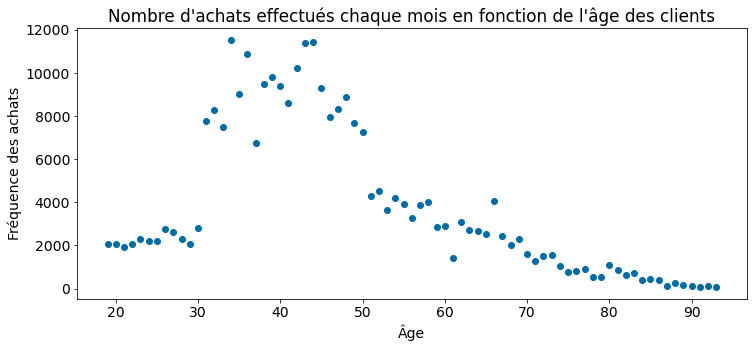

In [89]:
df_freq = data_final.groupby(['client_id','age']).count()
df_freq = df_freq.drop(['c_1609','c_4958','c_6714','c_3454'],axis = 0) # Outliers
df_freq = df_freq.reset_index()
frequenses = df_freq.groupby(['age']).sum()
frequenses = frequenses.drop([18],axis = 0)
frequenses = frequenses.reset_index()

plt.plot(frequenses["age"],frequenses["session_id"],'o')
plt.title('Nombre d\'achats effectués chaque mois en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Fréquence des achats")
plt.show()

In [90]:
print('Covariance empirique = ',np.cov(frequenses["age"],frequenses["session_id"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses["age"],frequenses["session_id"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de - 1')
print('Les valeurs suivent une distribution linéaire décroissante')

Covariance empirique =  -42153.01333333332
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  -0.5669316651729011
          
Le coefficient de corrélation de Pearson est proche de - 1
Les valeurs suivent une distribution linéaire décroissante


#### Fréquence des achats par mois / Tranche 18-30 ans

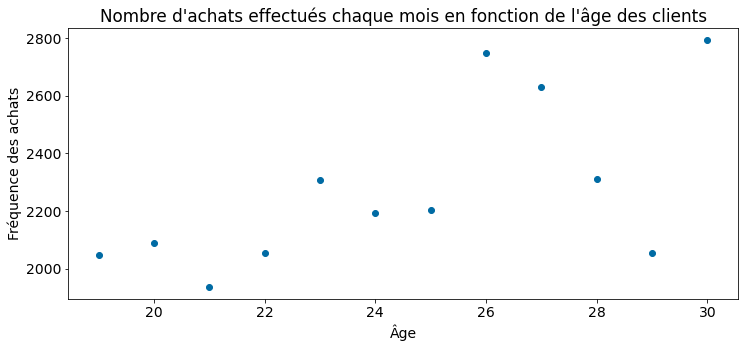

In [91]:
frequenses1 = frequenses[(frequenses['age'] >= 18)&(frequenses['age'] <= 30)]

plt.plot(frequenses1["age"],frequenses1["session_id"],'o')
plt.title('Nombre d\'achats effectués chaque mois en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Fréquence des achats")
plt.show()

In [92]:
print('Covariance empirique = ',np.cov(frequenses1["age"],frequenses1["session_id"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses1["age"],frequenses1["session_id"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 0')
print('Les valeurs suivent une distribution non-linéaire')

Covariance empirique =  614.0416666666666
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  0.6380165608414861
          
Le coefficient de corrélation de Pearson est proche de 0
Les valeurs suivent une distribution non-linéaire


#### Fréquence des achats par mois / Tranche 30-50 ans

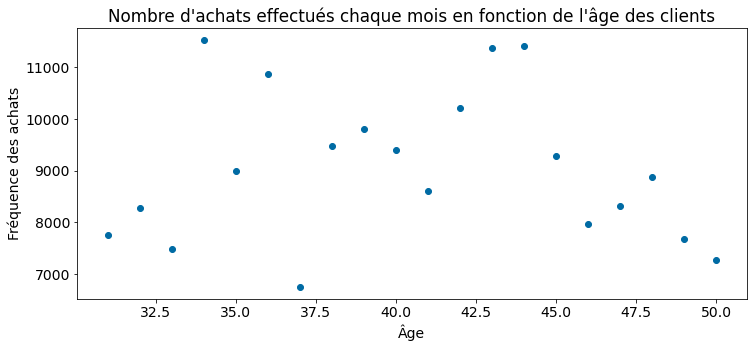

In [161]:
frequenses2 = frequenses[(frequenses['age'] > 30)&(frequenses['age'] <= 50)]

plt.plot(frequenses2["age"],frequenses2["session_id"],'o')
plt.title('Nombre d\'achats effectués chaque mois en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Fréquence des achats")
plt.show()

In [94]:
print('Covariance empirique = ',np.cov(frequenses2["age"],frequenses2["session_id"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses2["age"],frequenses2["session_id"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 0')
print('Les valeurs suivent une distribution non-linéaire')

Covariance empirique =  2436.095238095239
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  0.2098618157119698
          
Le coefficient de corrélation de Pearson est proche de 0
Les valeurs suivent une distribution non-linéaire


#### Fréquence des achats par mois / Tranche 50-70 ans

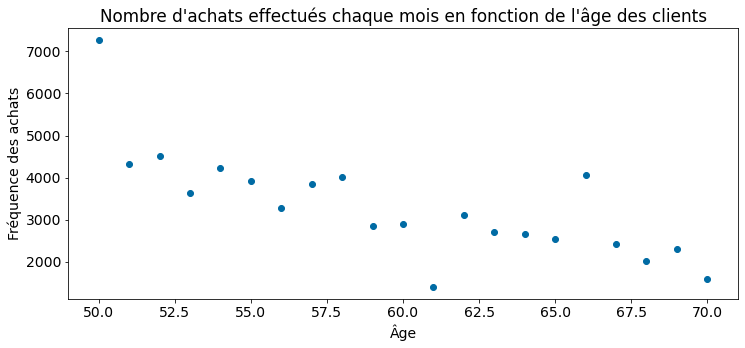

In [95]:
frequenses3 = frequenses[(frequenses['age'] > 50)&(frequenses['age'] <= 70)]

plt.plot(frequenses3["age"],frequenses3["session_id"],'o')
plt.title('Nombre d\'achats effectués chaque mois en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Fréquence des achats")
plt.show()

In [96]:
print('Covariance empirique = ',np.cov(frequenses3["age"],frequenses3["session_id"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses3["age"],frequenses3["session_id"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 1')
print('Les valeurs suivent une distribution linéaire')

Covariance empirique =  -5732.428571428572
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  -0.7580171388726693
          
Le coefficient de corrélation de Pearson est proche de 1
Les valeurs suivent une distribution linéaire


#### Fréquence des achats par mois / Tranche 70-95 ans

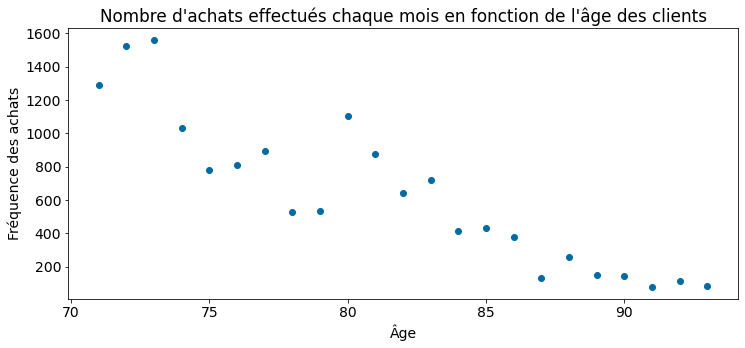

In [162]:
frequenses4 = frequenses[(frequenses['age'] > 70)&(frequenses['age'] <= 95)]

plt.plot(frequenses4["age"],frequenses4["session_id"],'o')
plt.title('Nombre d\'achats effectués chaque mois en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Fréquence des achats")
plt.show()

In [98]:
print('Covariance empirique = ',np.cov(frequenses4["age"],frequenses4["session_id"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses4["age"],frequenses4["session_id"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 1')
print('Les valeurs suivent une distribution linéaire croissante')

Covariance empirique =  -3034.875
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  -0.9196462966297179
          
Le coefficient de corrélation de Pearson est proche de 1
Les valeurs suivent une distribution linéaire croissante


In [99]:
print('Global :')
print(' '*50)
print('Covariance empirique = ',np.cov(frequenses["age"],frequenses["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses["age"],frequenses["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 18-30 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(frequenses1["age"],frequenses1["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses1["age"],frequenses1["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 30-50 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(frequenses2["age"],frequenses2["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses2["age"],frequenses2["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 50-70 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(frequenses3["age"],frequenses3["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses3["age"],frequenses3["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 70-95 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(frequenses4["age"],frequenses4["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(frequenses4["age"],frequenses4["price"])[0])

Global :
                                                  
Covariance empirique =  -42153.01333333332
Coefficient de corrélation de Pearson =  -0.5669316651729011
                                                  
--------------------------------------------------
                                                  
Tranche 18-30 ans :
                                                  
Covariance empirique =  614.0416666666666
Coefficient de corrélation de Pearson =  0.6380165608414861
                                                  
--------------------------------------------------
                                                  
Tranche 30-50 ans :
                                                  
Covariance empirique =  2436.095238095239
Coefficient de corrélation de Pearson =  0.2098618157119698
                                                  
--------------------------------------------------
                                                  
Tranche 50-70 ans :
           

Une corrélation est présente entre la fréquence des achats des clients chaque mois et l'âge des clients.

Cependant, cette corrélation est négative (plus les clients sont âgés, moins la fréquence des achats est élevée) et on peut constater que seule la tranche des 30-50 ans connait une corrélation positive. 

### Corrélation entre la taille du panier moyen et l'âge des clients

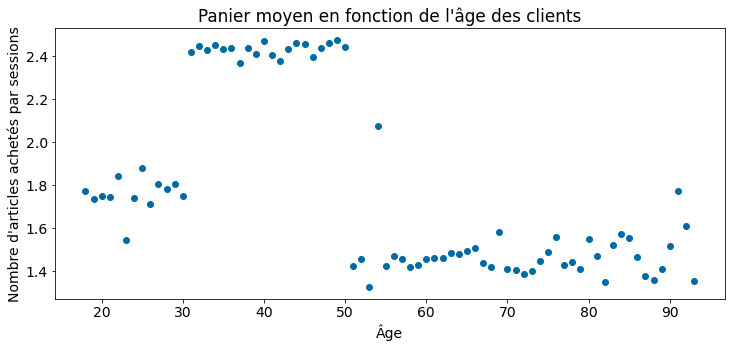

In [100]:
df_pan = data_final.groupby(['session_id','age']).count().reset_index()
pan_moy = df_pan.groupby(['age']).mean().reset_index()
pan_moy = pan_moy[['age','price']]

plt.plot(pan_moy["age"],pan_moy["price"],'o')
plt.title('Panier moyen en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Nombre d'articles achetés par sessions")
plt.show()

In [101]:
print('Covariance empirique = ',np.cov(pan_moy["age"],pan_moy["price"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy["age"],pan_moy["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 1')
print('Les valeurs suivent une distribution linéaire croissante')

Covariance empirique =  -5.269098354822254
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  -0.5769251428813409
          
Le coefficient de corrélation de Pearson est proche de 1
Les valeurs suivent une distribution linéaire croissante


#### Panier moyen / Tranche 18-30 ans

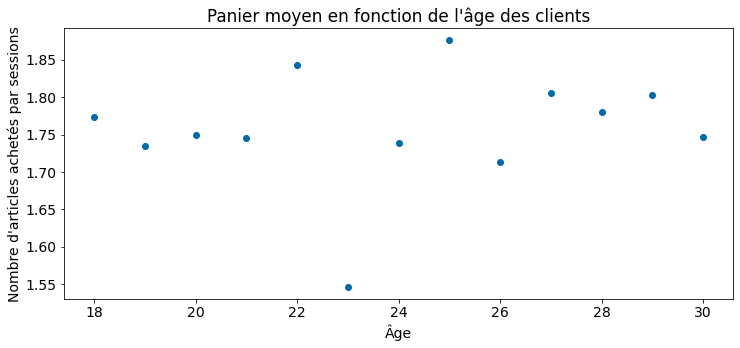

In [102]:
pan_moy1 = pan_moy[(pan_moy['age'] >= 18)&(pan_moy['age'] <= 30)]
plt.plot(pan_moy1["age"],pan_moy1["price"],'o')
plt.title('Panier moyen en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Nombre d'articles achetés par sessions")
plt.show()

In [103]:
print('Covariance empirique = ',np.cov(pan_moy1["age"],pan_moy1["price"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy1["age"],pan_moy1["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 0')
print('Les valeurs suivent une distribution non-linéaire')

Covariance empirique =  0.04300620355513875
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  0.15192070841389588
          
Le coefficient de corrélation de Pearson est proche de 0
Les valeurs suivent une distribution non-linéaire


#### Panier moyen / Tranche 30-50 ans

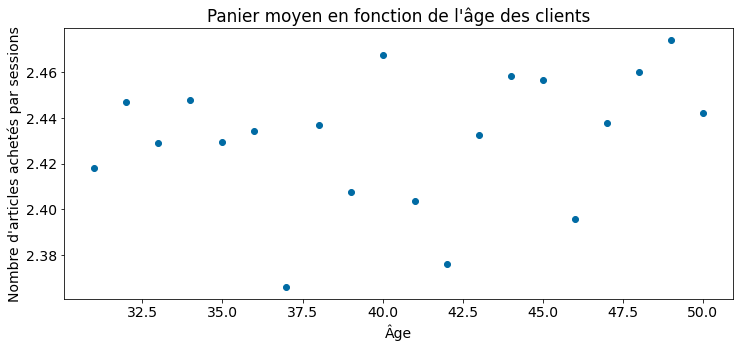

In [163]:
pan_moy2 = pan_moy[(pan_moy['age'] > 30)&(pan_moy['age'] <= 50)]
plt.plot(pan_moy2["age"],pan_moy2["price"],'o')
plt.title('Panier moyen en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Nombre d'articles achetés par sessions")
plt.show()

In [105]:
print('Covariance empirique = ',np.cov(pan_moy2["age"],pan_moy2["price"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy2["age"],pan_moy2["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 0')
print('Les valeurs suivent une distribution non-linéaire')

Covariance empirique =  0.3628792461304642
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  0.4036377341774039
          
Le coefficient de corrélation de Pearson est proche de 0
Les valeurs suivent une distribution non-linéaire


#### Panier moyen / Tranche 50-70 ans

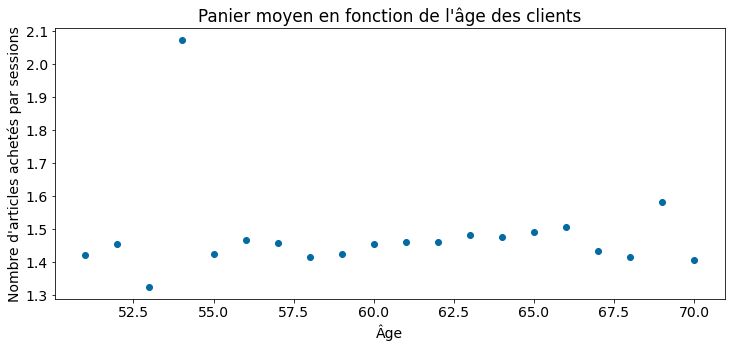

In [164]:
pan_moy3 = pan_moy[(pan_moy['age'] > 50)&(pan_moy['age'] <= 70)]
plt.plot(pan_moy3["age"],pan_moy3["price"],'o')
plt.title('Panier moyen en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Nombre d'articles achetés par sessions")
plt.show()

In [107]:
print('Covariance empirique = ',np.cov(pan_moy3["age"],pan_moy3["price"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy3["age"],pan_moy3["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 0')
print('Les valeurs suivent une distribution non-linéaire')

Covariance empirique =  -0.5355943494343748
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  -0.35675114313670075
          
Le coefficient de corrélation de Pearson est proche de 0
Les valeurs suivent une distribution non-linéaire


#### Panier moyen / Tranche 70-95 ans

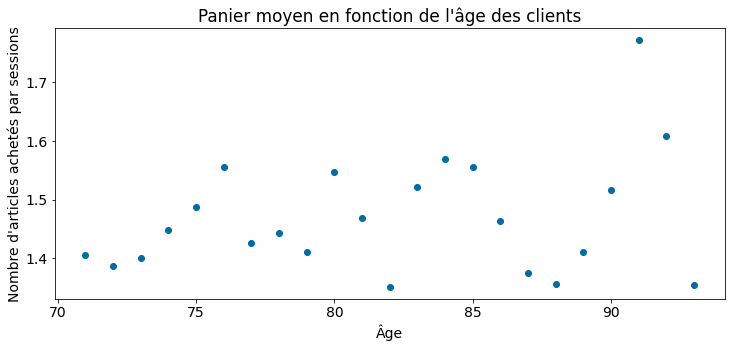

In [165]:
pan_moy4 = pan_moy[(pan_moy['age'] > 70)&(pan_moy['age'] <= 95)]
plt.plot(pan_moy4["age"],pan_moy4["price"],'o')
plt.title('Panier moyen en fonction de l\'âge des clients')
plt.xlabel("Âge")
plt.ylabel("Nombre d'articles achetés par sessions")
plt.show()

In [109]:
print('Covariance empirique = ',np.cov(pan_moy4["age"],pan_moy4["price"],ddof=0)[1,0])
print(' '*10)
print('-'*50)
print(' '*10)
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy4["age"],pan_moy4["price"])[0])
print(' '*10)
print('Le coefficient de corrélation de Pearson est proche de 1')
print('Les valeurs suivent une distribution linéaire')

Covariance empirique =  0.20459852912890286
          
--------------------------------------------------
          
Coefficient de corrélation de Pearson =  0.30480172859432286
          
Le coefficient de corrélation de Pearson est proche de 1
Les valeurs suivent une distribution linéaire


In [110]:
print('Global :')
print(' '*50)
print('Covariance empirique = ',np.cov(pan_moy["age"],pan_moy["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy["age"],pan_moy["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 18-30 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(pan_moy1["age"],pan_moy1["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy1["age"],pan_moy1["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 30-50 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(pan_moy2["age"],pan_moy2["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy2["age"],pan_moy2["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 50-70 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(pan_moy3["age"],pan_moy3["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy3["age"],pan_moy3["price"])[0])
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 70-95 ans :')
print(' '*50)
print('Covariance empirique = ',np.cov(pan_moy4["age"],pan_moy4["price"],ddof=0)[1,0])
print('Coefficient de corrélation de Pearson = ',st.pearsonr(pan_moy4["age"],pan_moy4["price"])[0])

Global :
                                                  
Covariance empirique =  -5.269098354822254
Coefficient de corrélation de Pearson =  -0.5769251428813409
                                                  
--------------------------------------------------
                                                  
Tranche 18-30 ans :
                                                  
Covariance empirique =  0.04300620355513875
Coefficient de corrélation de Pearson =  0.15192070841389588
                                                  
--------------------------------------------------
                                                  
Tranche 30-50 ans :
                                                  
Covariance empirique =  0.3628792461304642
Coefficient de corrélation de Pearson =  0.4036377341774039
                                                  
--------------------------------------------------
                                                  
Tranche 50-70 ans :
       

### Corrélation entre l'âge des clients et les catégories de produits

In [111]:
age = list(data_final['age'])
tran_age = []
dat_tran = data_final
 
for tran in age:
    if (tran >= 18)&(tran <= 30):
        tran_age.append(int(0))
    elif (tran > 30)&(tran <= 50): 
        tran_age.append(int(1))
    elif (tran > 50)&(tran <= 70):
        tran_age.append(int(2))
    else:
        tran_age.append(int(3))

dat_tran['tran_age'] = tran_age

<ipython-input-111-673fb79a6cf5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_tran['tran_age'] = tran_age


In [112]:
X = "categ" # qualitative
Y = "age" # quantitative

# On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [113]:
print('Rapport de corrélation = ', eta_squared(data_final[X],data_final[Y]))
print(' '*10)
print('-'*50)
print(' '*10)
print('Le rapport de corrélation est proche de 0')
print(' '*10)
print('Il n\'y a pas de corrélation entre les catégories de produit et les âges.')

Rapport de corrélation =  0.11866755107248272
          
--------------------------------------------------
          
Le rapport de corrélation est proche de 0
          
Il n'y a pas de corrélation entre les catégories de produit et les âges.


#### Tranche 18-30 ans

In [114]:
print('Rapport de corrélation = ', eta_squared(data_final[(data_final['age'] >= 18)&(data_final['age'] <= 30)][X],data_final[(data_final['age'] >= 18)&(data_final['age'] <= 30)][Y]))
print(' '*10)
print('-'*50)
print(' '*10)
print('Le rapport de corrélation éloigné de 0')
print(' '*10)
print('Il y a une corrélation entre les catégories de produit et les âges.')

Rapport de corrélation =  4.8843941447684504e-06
          
--------------------------------------------------
          
Le rapport de corrélation éloigné de 0
          
Il y a une corrélation entre les catégories de produit et les âges.


#### Tranche 30-50 ans

In [115]:
print('Rapport de corrélation = ', eta_squared(data_final[(data_final['age'] >= 30)&(data_final['age'] <= 50)][X],data_final[(data_final['age'] >= 30)&(data_final['age'] <= 50)][Y]))
print(' '*10)
print('-'*50)
print(' '*10)
print('Le rapport de corrélation est proche de 0')
print(' '*10)
print('Il n\'y a pas de corrélation entre les catégories de produit et les âges.')

Rapport de corrélation =  0.013778642679910379
          
--------------------------------------------------
          
Le rapport de corrélation est proche de 0
          
Il n'y a pas de corrélation entre les catégories de produit et les âges.


#### Tranche 50-70 ans

In [116]:
print('Rapport de corrélation = ', eta_squared(data_final[(data_final['age'] >= 50)&(data_final['age'] <= 70)][X],data_final[(data_final['age'] >= 50)&(data_final['age'] <= 70)][Y]))
print(' '*10)
print('-'*50)
print(' '*10)
print('Le rapport de corrélation est proche de 0')
print(' '*10)
print('Il n\'y a pas de corrélation entre les catégories de produit et les âges.')

Rapport de corrélation =  0.008188773217117619
          
--------------------------------------------------
          
Le rapport de corrélation est proche de 0
          
Il n'y a pas de corrélation entre les catégories de produit et les âges.


#### Tranche 70-95 ans

In [117]:
print('Rapport de corrélation = ', eta_squared(data_final[(data_final['age'] >= 70)&(data_final['age'] <= 95)][X],data_final[(data_final['age'] >= 70)&(data_final['age'] <= 95)][Y]))
print(' '*10)
print('-'*50)
print(' '*10)
print('Le rapport de corrélation est proche de 0')
print(' '*10)
print('Il n\'y a pas de corrélation entre les catégories de produit et les âges.')

Rapport de corrélation =  0.0003225172788900192
          
--------------------------------------------------
          
Le rapport de corrélation est proche de 0
          
Il n'y a pas de corrélation entre les catégories de produit et les âges.


In [118]:
print('Global :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[X],data_final[Y]))
print(' '*50)
print('Force de la corrélation = Faible')
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 18-30 ans :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[(data_final['age'] >= 18)&(data_final['age'] <= 30)][X],data_final[(data_final['age'] >= 18)&(data_final['age'] <= 30)][Y]))
print(' '*50)
print('Force de la corrélation = Très faible')
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 30-50 ans :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[(data_final['age'] >= 30)&(data_final['age'] <= 50)][X],data_final[(data_final['age'] >= 30)&(data_final['age'] <= 50)][Y]))
print(' '*50)
print('Force de la corrélation = Faible')
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 50-70 ans :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[(data_final['age'] >= 50)&(data_final['age'] <= 70)][X],data_final[(data_final['age'] >= 50)&(data_final['age'] <= 70)][Y]))
print(' '*50)
print('Force de la corrélation = Très faible')
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 70-95 ans :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[(data_final['age'] >= 70)&(data_final['age'] <= 95)][X],data_final[(data_final['age'] >= 70)&(data_final['age'] <= 95)][Y]))
print(' '*50)
print('Force de la corrélation = Très faible')

Global :
                                                  
Rapport de corrélation =  0.11866755107248272
                                                  
Force de la corrélation = Faible
                                                  
--------------------------------------------------
                                                  
Tranche 18-30 ans :
                                                  
Rapport de corrélation =  4.8843941447684504e-06
                                                  
Force de la corrélation = Très faible
                                                  
--------------------------------------------------
                                                  
Tranche 30-50 ans :
                                                  
Rapport de corrélation =  0.013778642679910379
                                                  
Force de la corrélation = Faible
                                                  
------------------------------------------

In [119]:
X = "tran_age"
Y = "categ"

chi = data_final.set_index('tran_age')
chi = chi.rename({0 : '18-30',1 : '30-50',2 : '50-70',3 : '70-95'}, axis='index')
chi = chi.reset_index()
chi_age = chi[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
chi_age2 = chi[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=False,margins_name="Total")
chi_age

categ,0.0,1.0,2.0,Total
tran_age,,,,
18-30,7532,14180,15062,36774
30-50,146015,46583,536,193134
50-70,30090,38793,661,69544
70-95,6184,8171,114,14469
Total,189821,107727,16373,313921


In [121]:
print('p = valeurs à tester')
print('p0 = valeurs témoin')
print('_ _'*20)
print(' '*10)
print('H0 : p = p0')
print(' '*10)
print('H1 : p ≠ p0')
print(' '*10)
print('-'*10)
print(' '*10)
print('Degré de liberté = ',degrees)
print(' '*10)
print('X² =',chi2)
print(' '*10)
print('-'*10)
print(' '*10)
print('Pour un risque α de 0.1, VC =', 10.64)
print('-'*3)
print('Pour un risque α de 0.05, VC =', 12.59)
print('-'*3)
print('Pour un risque α de 0.025, VC =', 14.45)
print('-'*3)
print('Pour un risque α de 0.005, VC =', 16.81)
print('-'*3)
print('Pour un risque α de 0.001, VC =', 18.55)
print(' '*10)
print('='*50)
print(' '*10)
print('VC < X²')
print(' '*10)
print('-'*10)
print(' '*10)
print('Rejet de H0')
print(' '*10)
print('-'*10)
print(' '*10)
print('P-Value =',pvalue)
print(' '*10)
print('La P-Value est inférieure à 0,1.')
print('La P-Value confirme le rejet de H0')

p = valeurs à tester
p0 = valeurs témoin
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
          
H0 : p = p0
          
H1 : p ≠ p0
          
----------
          
Degré de liberté =  6
          
X² = 140721.69331667523
          
----------
          
Pour un risque α de 0.1, VC = 10.64
---
Pour un risque α de 0.05, VC = 12.59
---
Pour un risque α de 0.025, VC = 14.45
---
Pour un risque α de 0.005, VC = 16.81
---
Pour un risque α de 0.001, VC = 18.55
          
          
VC < X²
          
----------
          
Rejet de H0
          
----------
          
P-Value = 0.0
          
La P-Value est inférieure à 0,1.
La P-Value confirme le rejet de H0


A travers les chiffres, on peut déduire une absence de relation entre les catégories de produits et l'âge.

#### Corrélation entre l'âge des clients et les prix des produits

In [122]:
price = list(data_final['price'])
tran_price = []
dat_tran = data_final
 
for tran in price:
    if (tran >= 0)&(tran <= 10):
        tran_price.append(int(0))
    elif (tran > 10)&(tran <= 20): 
        tran_price.append(int(1))
    elif (tran > 20)&(tran <= 40):
        tran_price.append(int(2))
    elif (tran > 40)&(tran <= 60):
        tran_price.append(int(3))
    else:
        tran_price.append(int(4))

dat_tran['tran_price'] = tran_price

<ipython-input-122-a5dbff6d63d1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_tran['tran_price'] = tran_price


In [123]:
X = "price" # qualitative
Y = "age" # quantitative

# On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [124]:
print('Rapport de corrélation = ', eta_squared(data_final[X],data_final[Y]))
print(' '*10)
print('-'*50)
print(' '*10)
print('Le rapport de corrélation est proche de 0')
print(' '*10)
print('Il n\'y a pas de corrélation entre les catégories de produit et les âges.')

Rapport de corrélation =  0.11443444616605013
          
--------------------------------------------------
          
Le rapport de corrélation est proche de 0
          
Il n'y a pas de corrélation entre les catégories de produit et les âges.


In [125]:
print('Global :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[X],data_final[Y]))
print(' '*50)
print('Force de la corrélation = Faible')
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 0-10 € :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[(data_final['price'] >= 0)&(data_final['price'] <= 10)][X],data_final[(data_final['price'] >= 0)&(data_final['price'] <= 10)][Y]))
print(' '*50)
print('Force de la corrélation = Très faible')
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 10-20 € :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[(data_final['price'] > 10)&(data_final['price'] <= 20)][X],data_final[(data_final['price'] > 10)&(data_final['price'] <= 20)][Y]))
print(' '*50)
print('Force de la corrélation = Très faible')
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 20-40 € :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[(data_final['price'] > 20)&(data_final['price'] <= 40)][X],data_final[(data_final['price'] > 20)&(data_final['price'] <= 40)][Y]))
print(' '*50)
print('Force de la corrélation = Très faible')
print(' '*50)
print('-'*50)
print(' '*50)
print('Tranche 40-60 € :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[(data_final['price'] > 40)&(data_final['price'] <= 60)][X],data_final[(data_final['price'] > 40)&(data_final['price'] <= 60)][Y]))
print(' '*50)
print('Force de la corrélation = Faible')
print('-'*50)
print(' '*50)
print('Tranche Sup à 60 € :')
print(' '*50)
print('Rapport de corrélation = ',eta_squared(data_final[(data_final['price'] > 60)][X],data_final[(data_final['price'] > 60)][Y]))
print(' '*50)
print('Force de la corrélation = Faible')

Global :
                                                  
Rapport de corrélation =  0.11443444616605013
                                                  
Force de la corrélation = Faible
                                                  
--------------------------------------------------
                                                  
Tranche 0-10 € :
                                                  
Rapport de corrélation =  0.005800196448989994
                                                  
Force de la corrélation = Très faible
                                                  
--------------------------------------------------
                                                  
Tranche 10-20 € :
                                                  
Rapport de corrélation =  0.012394560090377942
                                                  
Force de la corrélation = Très faible
                                                  
--------------------------------------------

In [126]:
X = "tran_age"
Y = "tran_price"

chi = data_final.set_index('tran_age')
chi = chi.rename({0 : '18-30',1 : '30-50',2 : '50-70',3 : '70-95'}, axis='index')
chi_p = chi.reset_index()
chi_p = chi_p.set_index('tran_price')
chi_p = chi_p.rename({0 : '0-10',1 : '10-20',2 : '20-40',3 : '40-60',4 : '<60'}, axis='index')
chi_p = chi_p.reset_index()
chi_prix = chi_p[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
chi_prix2 = chi_p[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=False,margins_name="Total")
chi_prix

tran_price,0-10,10-20,20-40,40-60,<60,Total
tran_age,,,,,,
18-30,4098,10906,6555,6710,8505,36774
30-50,75128,94991,21651,863,501,193134
50-70,16044,34573,17602,778,547,69544
70-95,3262,7239,3715,161,92,14469
Total,98532,147709,49523,8512,9645,313921


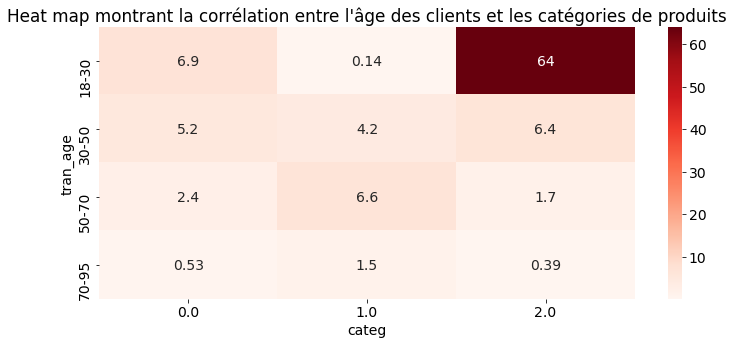

In [127]:
tx = chi_prix.loc[:,["Total"]]
ty = chi_age.loc[["Total"],:]
n = len(data_final)
indep = tx.dot(ty) / n

c = chi_age.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = (measure/xi_n)*100
sns.heatmap(table.iloc[:4,0:-1],annot=True, cmap='Reds')
plt.title('Heat map montrant la corrélation entre l\'âge des clients et les catégories de produits')
plt.show()
chi2, pvalue, degrees, expected = st.chi2_contingency(chi_age2)